# **APS1052: AI in Finance**
# Final Project : Multiple Stock Prediction
----

## Group members:

Name | Student ID | E-mail 
--- | --- | --- 
Keyan Ahmadi| 1002436740 |  k.ahmadi@mail.utoronto.ca
Bhagyashree Keswani| 1006790849 | bhagyashree.keswani@mail.utoronto.ca 
Nagarajan Jayaraman | 1006784044 | nagarajan.jayaraman@mail.utoronto.ca

### Summary of contents in this file:

1. Data cleaning- To fill the missing values and check correlation between all the features.

2. Displaying the feature importance plot for each stock.

3. Performing Feature Selection using Recursive Feature Elimination(RFE).

4. Performing Exploratory Data Analysis to determine whether the features require smoothing.



### Importing all the Relevant Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")

### Importing the Data

Prior to importing the the dataset below ("feature_eng_df.csv"), we used the original dataset (from WRDS) to developed technical Financial indicators.

For more details please see the "Feature_engineering" Notebook provided in our submission


In [ ]:
#Importing the feature engineering df generated from Feature_Engineering.ipynb
feature_eng_df=pd.read_csv('feature_eng_df.csv')
feature_eng_df.drop(['Unnamed: 0'],axis=1, inplace=True)
feature_eng_df.head(2)

TICKER        date        PRC       VOL        BID        ASK    OPENPRC  \
0   AAPL  2011-01-03  329.57001  16438280  329.70999  329.72000  325.64001   
1   AAPL  2011-01-04  331.29001  11444072  331.29001  331.29999  332.44000   

     sprtrn  price  dix  ...  bb_high  bb_low  macd  EMA For 10 Days  \
0  0.011315    NaN  NaN  ...      NaN     NaN   NaN              NaN   
1 -0.001313    NaN  NaN  ...      NaN     NaN   NaN              NaN   

   EMA For 21 Days  EMA For 50 Days  ADX  SAR  PutCallParity  PutCallRatio  
0              NaN              NaN  NaN  NaN     177.707767      0.595386  
1              NaN              NaN  NaN  NaN     178.826154      0.746331  

[2 rows x 40 columns]

# 1. Data Cleaning & Finding Feature Correlation 

##1.1 APPLE

### 1.1.A) Data Cleaning: Handling The Missing Data in the Apple Dataset

In [ ]:
df_App_All_Features = feature_eng_df[feature_eng_df.TICKER=='AAPL']
df_App_All_Features.shape

(2831, 40)

In [ ]:
# Seeing all the NaN values presented in the DataFrame
df_App_All_Features.isnull().sum(axis=0)

TICKER              0
date                0
PRC                 0
VOL                 0
BID                 0
ASK                 0
OPENPRC             0
sprtrn              0
price              82
dix                82
gex                82
vixo                0
vixh                0
vixl                0
vix                 0
close               1
vol                 1
high                1
low                 1
lag_ret0            0
lag_ret1            0
lag_ret2            0
lag_ret3            0
lag_ret4            0
lag_ret5            0
lag_ret6            0
lag_ret7            0
lag_ret8            0
lag_ret9            0
rsi                15
bb_high            20
bb_low             23
macd               34
EMA For 10 Days     9
EMA For 21 Days    20
EMA For 50 Days    49
ADX                20
SAR                 2
PutCallParity       0
PutCallRatio        0
dtype: int64

The above code shows the total NaN values in each column. We will impute each feature accordingly. 

In [ ]:
df_App_All_Features[["price","dix","gex"]].describe()

price          dix           gex
count  2749.000000  2749.000000  2.749000e+03
mean   2441.266809     0.422730  2.763341e+09
std     898.022079     0.029365  2.816773e+09
min    1099.229980     0.330555 -7.496823e+09
25%    1829.829956     0.402832  1.256577e+09
50%    2175.030029     0.421676  2.265239e+09
75%    2889.670000     0.440891  3.498179e+09
max    4796.560059     0.546802  2.421867e+10

In [ ]:
####  price, dix, and gex

# All 3 features have only 82 NaN values, knowing that the dataset is only 2831 instances, the NaN value accounts for less than 3% of the instances.
# Therefore, we will fill the NaN values for each feature with its corresponding Mean as this value will have the highest probability of being the 
# actual value in the dataset. 

df_App_All_Features['price'].fillna((df_App_All_Features['price'].mean()), inplace=True)
df_App_All_Features['dix'].fillna((df_App_All_Features['dix'].mean()), inplace=True)
df_App_All_Features['gex'].fillna((df_App_All_Features['gex'].mean()), inplace=True)


In [ ]:
####  close, vol, high, and low (impute with zero)

# all 4 features just have 1 NaN value. the NaN value accounts for less than 0.1% of the instances. Imputing this value or dropping it would not make
# any significant changes to the model, however, we will impute .............

df_App_All_Features['close'] = df_App_All_Features['close'].fillna(0)
df_App_All_Features['vol'] = df_App_All_Features['vol'].fillna(0)
df_App_All_Features['high'] = df_App_All_Features['high'].fillna(0)
df_App_All_Features['low'] = df_App_All_Features['low'].fillna(0)

In [ ]:
####  rsi 

# The rsi feature only has 15 NaN values, knowing that the dataset is only 2831 instances, the NaN values accounts for approximately 0.5% of the 
# instances. The rsi feature moves between 0 and 100 regularly. We have decided to impute rsi with the mean as this value will have the highest 
# probability of being the actual value in the dataset. 

df_App_All_Features['rsi'].fillna((df_App_All_Features['rsi'].mean()), inplace=True)

In [ ]:
####  bb_high bb_low 
 
# The bb_high has 20 NaN values and bb_low has 23 NaN values, knowing that the dataset is only 2831 instances, the NaN values accounts for approximately 
# less than 1% of the instances. We have decided to impute these two featues with the mean as this value will have the highest probability of being the 
# actual value in the dataset. 

df_App_All_Features['bb_high'].fillna((df_App_All_Features['bb_high'].mean()), inplace=True)
df_App_All_Features['bb_low'].fillna((df_App_All_Features['bb_low'].mean()), inplace=True)

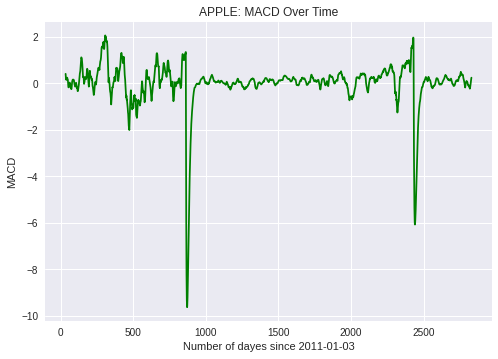

In [ ]:
# Plotting the MACD from 2011-01-03 to 2022-03-31

y = df_App_All_Features["macd"].tolist()
x = list(range(2831))


plt.style.use("seaborn")
plt.grid(True)
plt.plot(x, y, color="green", marker="x")


plt.title("APPLE: MACD Over Time")
plt.ylabel('MACD')
plt.xlabel('Number of dayes since 2011-01-03')

plt.show()

In [ ]:
####  MACD

# This feature has 34 NaN values, knowing that the dataset is only 2831 instances, the NaN values accounts for approximately 1% of the instances.
# From the above plot we can see that there is no inherent trend within the dataset, as the value constantly moves up and down and therefore, 
# we will not extrapolate to find the missing values. 
# MACD is defined as the difference between the 26-period EMA and  the 12-period EMA and therefore for the first 25 values, we will impute with 0 
# (as there cannot be any MACD values before the 26-period EMA is calculated)and from 26 to 33 we will impute the NaN values with the 34 value (0.406858)
# in other words we will back fill the NaN values between 26 and 33 using the 34th value. 


df_App_All_Features.loc[:24,"macd"] = 0
df_App_All_Features.loc[25:33,"macd"] = 0.406858

In [ ]:
####   EMA For 10 Days, EMA For 21 Days, EMA For 50 Days

# For these features, since the before the EMA period (e.g., 10 day) there can be no value (i.e., on the 9th day we cant have any value for a EMA
# with a time period of 10 as the first value can only be calculated on the 10th day) we will impute the NaN values with 0. 

df_App_All_Features['EMA For 10 Days'] = df_App_All_Features['EMA For 10 Days'].fillna(0)
df_App_All_Features['EMA For 21 Days'] = df_App_All_Features['EMA For 21 Days'].fillna(0)
df_App_All_Features['EMA For 50 Days'] = df_App_All_Features['EMA For 50 Days'].fillna(0)


In [ ]:
####  ADX

# The ADX feature only has 20 NaN values, knowing that the dataset is only 2831 instances, the NaN values accounts for approximately 0.7% of the 
# instances. We have decided to impute ADX with the mean as this value will have the highest probability of being the actual value in the dataset. 

df_App_All_Features['ADX'].fillna((df_App_All_Features['ADX'].mean()), inplace=True)

In [ ]:
####  SAR

# The SAR feature has 2 NaN value. the NaN value accounts for less than 0.1% of the instances. Imputing this value or dropping it would not make
# any significant changes to the model, however, we will impute these values with the mean (highest probability of being the actual value) to be on the 
# safe side and introduce all possible data to the model. 

df_App_All_Features['SAR'].fillna((df_App_All_Features['SAR'].mean()), inplace=True)

### 1.1.B) Finding Feature Correlation 

In [ ]:
df_App = df_App_All_Features.copy()

#Building the regression target to identify the best features through RFE
df_App['RetFut1'] = df_App['OPENPRC'].pct_change(1).shift(-1).fillna(0)
df_App_All_Features['RetFut1'] = df_App_All_Features['OPENPRC'].pct_change(1).shift(-1).fillna(0)
# We decided to drop features 'label', 'Year', "OPENPRC", and "price" for the following reason: 
#     - "OPENPRC" and "price" have been used when calculating other features such as EMA and so these features will be highly correlated to
#       one another and we decided to drop these features and focus on the remaining features for futher analysis.

df_App.drop(["OPENPRC", "price"],axis=1,inplace=True)

print("DataFrame shape:", df_App.shape)

df_App.head(3)

DataFrame shape: (2831, 39)


TICKER        date        PRC       VOL        BID        ASK    sprtrn  \
0   AAPL  2011-01-03  329.57001  16438280  329.70999  329.72000  0.011315   
1   AAPL  2011-01-04  331.29001  11444072  331.29001  331.29999 -0.001313   
2   AAPL  2011-01-05  334.00000   9486655  333.97000  334.00000  0.005007   

       dix           gex   vixo  ...    bb_low  macd  EMA For 10 Days  \
0  0.42273  2.763341e+09  17.94  ...  0.070503   0.0              0.0   
1  0.42273  2.763341e+09  17.34  ...  0.070503   0.0              0.0   
2  0.42273  2.763341e+09  17.81  ...  0.070503   0.0              0.0   

   EMA For 21 Days  EMA For 50 Days        ADX         SAR  PutCallParity  \
0              0.0              0.0  27.808766  260.141727     177.707767   
1              0.0              0.0  27.808766  260.141727     178.826154   
2              0.0              0.0  27.808766  329.709990     180.856263   

   PutCallRatio   RetFut1  
0      0.595386  0.020882  
1      0.746331 -0.008693  
2      0.566319  0.015685  

[3 rows x 39 columns]

Text(179.09375, 0.5, 'Features')

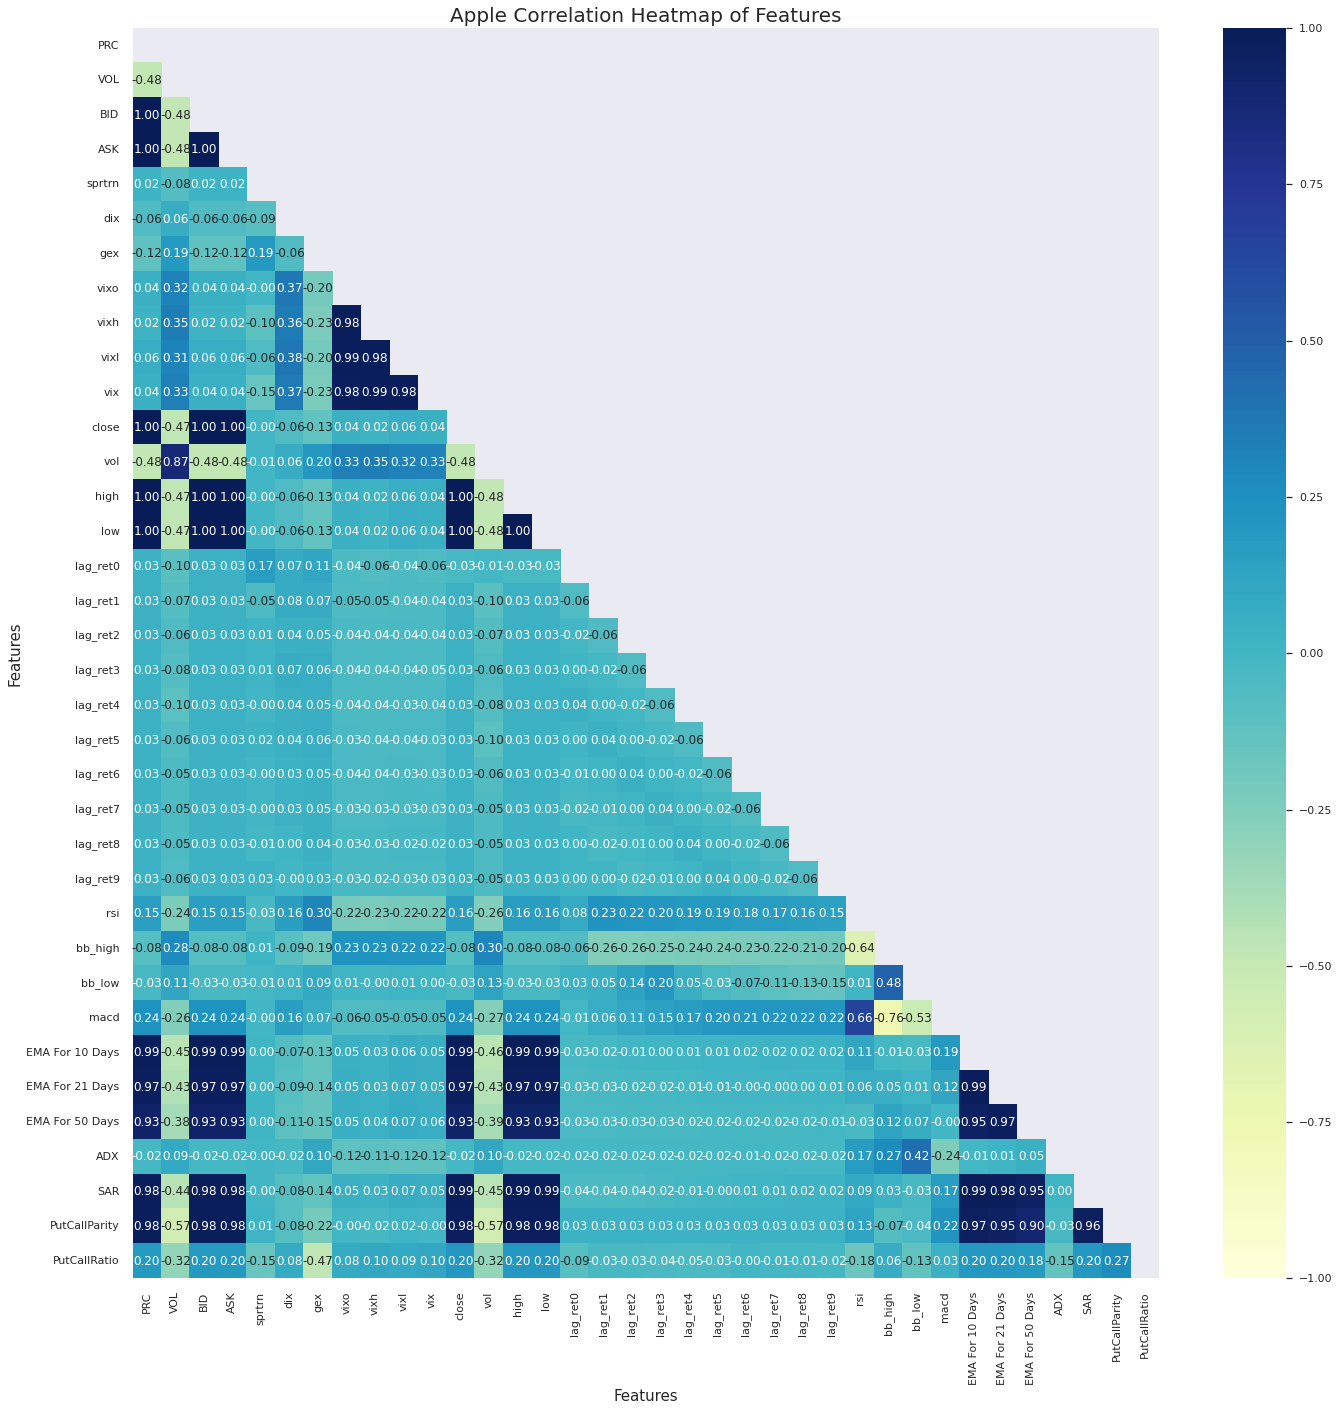

In [ ]:
df_heatmap1 = df_App.copy()
df_heatmap1.drop(['RetFut1'],axis=1,inplace=True)

sns.set(rc={'figure.figsize':(23,23)}, font_scale = 1)

mask = np.zeros_like(df_heatmap1.corr()*-1)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_heatmap1.corr(),annot=True,fmt='.2f', vmin=-1,vmax=1,mask=mask,cmap="YlGnBu")


plt.title('Apple Correlation Heatmap of Features', fontsize=20)
plt.xlabel("Features",fontsize=15)
plt.ylabel("Features",fontsize=15)

We created a correlation matrix using the "DataFrame.corr()" function to map the feature-to-feature collinearity. This helps better understand the independent variables and their relationship between one another before training the machine learning models. It is important that no variables are highly correlated to one another as this causes problems when fitting the machine learning model and interpreting the results. The stronger the correlation, the more difficult it is to change one variable without changing another and this makes it more difficult for the model to estimate relationships. We used the following correlation scale via Andrews University [2] to judge the severity of correlation between features: 
- Correlation coefficients whose magnitude are between 0.9 and 1.0 indicate variables which can be considered very highly correlated. 
- Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables which can be considered highly correlated. 
- Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated. 
- Correlation coefficients whose magnitude are between 0.3 and 0.5 indicate variables which have a low correlation. 
- Correlation coefficients whose magnitude are less than 0.3 have little if any (linear) correlation.

The majority of feature-to-feature correlations were moderately correlated however, through examining the correlation plot, we can see that some features are highly and very highly correlated to one another. The above function (corr_high_list) will be used to find all correlated features which will be dropped later. 

ref: https://www.andrews.edu/~calkins/math/edrm611/edrm05.htm#:~:text=Correlation%20coefficients%20whose%20magnitude%20are%20between%200.7%20and%200.9%20indicate,can%20be%20considered%20highly%20correlated

In [ ]:
# The following function selects highly correlated features and removes the 1st feature that is highly correlated with any other features

def corr_high_list(DataFrame, limit):
    col_corr = set()                       # All the names of correlated columns
    corr_matrix = DataFrame.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            
            if abs(corr_matrix.iloc[i, j]) > limit: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
                
    return col_corr

In [ ]:
# Finding the Highly correlated features above the 0.75 threshold
High_Corr_Features = corr_high_list(df_App, 0.75)
# Printing the highly correlated features 
High_Corr_Features


# # Dropping the highly correlated features from the train dataset
# df_App = df_App.drop(High_Corr_Features, axis =1)

{'ASK',
 'BID',
 'EMA For 10 Days',
 'EMA For 21 Days',
 'EMA For 50 Days',
 'PutCallParity',
 'SAR',
 'close',
 'high',
 'low',
 'macd',
 'vix',
 'vixh',
 'vixl',
 'vol'}

The above shows a list of features that are highly correlated to one another. Except for "EMA For 50 Days" all features will be dropped in order to avoid introducing further complexity and noise to the model. The reason why all EMA features are listed above is that all three features explain the same trend in the dataset with subtle differences and hence it makes sense why they would be highly correlated to one another. Since "EMA For 50 Days" has the highest importance with respect to the target variable (as shown further in the code in the bar plot) we will keep this feature and drop the other two ('EMA For 10 Days', 'EMA For 21 Days'). 

## 1.2 IBM

In [ ]:
df_IBM_All_Features = feature_eng_df[feature_eng_df.TICKER=='IBM']

In [ ]:
df_IBM_All_Features.head(2)

TICKER        date     PRC      VOL        BID     ASK    OPENPRC  \
2831    IBM  2011-01-03  147.48  4604900  147.42999  147.44  147.21001   
2832    IBM  2011-01-04  147.64  5060100  147.67000  147.70  147.56000   

        sprtrn  price  dix  ...  bb_high  bb_low  macd  EMA For 10 Days  \
2831  0.011315    NaN  NaN  ...      NaN     NaN   NaN              NaN   
2832 -0.001313    NaN  NaN  ...      NaN     NaN   NaN              NaN   

      EMA For 21 Days  EMA For 50 Days  ADX  SAR  PutCallParity  PutCallRatio  
2831              NaN              NaN  NaN  NaN      -4.382243      0.595386  
2832              NaN              NaN  NaN  NaN      -4.823856      0.746331  

[2 rows x 40 columns]

### 1.2.A) Handling The Missing Data in the IBM Dataset


In [ ]:
# Seeing all the NaN values presented in the DataFrame
df_IBM_All_Features.isnull().sum(axis=0)

TICKER              0
date                0
PRC                 0
VOL                 0
BID                 0
ASK                 0
OPENPRC             0
sprtrn              0
price              82
dix                82
gex                82
vixo                0
vixh                0
vixl                0
vix                 0
close               1
vol                 1
high                1
low                 1
lag_ret0            0
lag_ret1            0
lag_ret2            0
lag_ret3            0
lag_ret4            0
lag_ret5            0
lag_ret6            0
lag_ret7            0
lag_ret8            0
lag_ret9            0
rsi                15
bb_high            20
bb_low             20
macd               34
EMA For 10 Days     9
EMA For 21 Days    20
EMA For 50 Days    49
ADX                20
SAR                 2
PutCallParity       0
PutCallRatio        0
dtype: int64

We will impute all the missing values in IBM dataframe following the same methods outlined previsouly in the Apple DataFrame




In [ ]:
df_IBM_All_Features['price'].fillna((df_IBM_All_Features['price'].mean()), inplace=True)
df_IBM_All_Features['dix'].fillna((df_IBM_All_Features['dix'].mean()), inplace=True)
df_IBM_All_Features['gex'].fillna((df_IBM_All_Features['gex'].mean()), inplace=True)

df_IBM_All_Features['close'] = df_IBM_All_Features['close'].fillna(0)
df_IBM_All_Features['vol'] = df_IBM_All_Features['vol'].fillna(0)
df_IBM_All_Features['high'] = df_IBM_All_Features['high'].fillna(0)
df_IBM_All_Features['low'] = df_IBM_All_Features['low'].fillna(0)

df_IBM_All_Features['rsi'].fillna((df_IBM_All_Features['rsi'].mean()), inplace=True)
df_IBM_All_Features['bb_high'].fillna((df_IBM_All_Features['bb_high'].mean()), inplace=True)
df_IBM_All_Features['bb_low'].fillna((df_IBM_All_Features['bb_low'].mean()), inplace=True)
df_IBM_All_Features.loc[2831:2855,"macd"] = 0
df_IBM_All_Features.loc[2856:2864,"macd"] = 0.406858
df_IBM_All_Features['EMA For 10 Days'] = df_IBM_All_Features['EMA For 10 Days'].fillna(0)
df_IBM_All_Features['EMA For 21 Days'] = df_IBM_All_Features['EMA For 21 Days'].fillna(0)
df_IBM_All_Features['EMA For 50 Days'] = df_IBM_All_Features['EMA For 50 Days'].fillna(0)
df_IBM_All_Features['ADX'].fillna((df_IBM_All_Features['ADX'].mean()), inplace=True)
df_IBM_All_Features['SAR'].fillna((df_IBM_All_Features['SAR'].mean()), inplace=True)

In [ ]:
df_IBM_All_Features.isnull().sum()

TICKER             0
date               0
PRC                0
VOL                0
BID                0
ASK                0
OPENPRC            0
sprtrn             0
price              0
dix                0
gex                0
vixo               0
vixh               0
vixl               0
vix                0
close              0
vol                0
high               0
low                0
lag_ret0           0
lag_ret1           0
lag_ret2           0
lag_ret3           0
lag_ret4           0
lag_ret5           0
lag_ret6           0
lag_ret7           0
lag_ret8           0
lag_ret9           0
rsi                0
bb_high            0
bb_low             0
macd               0
EMA For 10 Days    0
EMA For 21 Days    0
EMA For 50 Days    0
ADX                0
SAR                0
PutCallParity      0
PutCallRatio       0
dtype: int64

### 1.2.B) Finding Feature Correlation



In [ ]:
df_IBM = df_IBM_All_Features.copy()

#Building the regression target to identify the best features through RFE
df_IBM['RetFut1'] = df_IBM['OPENPRC'].pct_change(1).shift(-1).fillna(0)
df_IBM_All_Features['RetFut1'] = df_IBM_All_Features['OPENPRC'].pct_change(1).shift(-1).fillna(0)

df_IBM.drop(["OPENPRC", "price"],axis=1,inplace=True)

print("DataFrame shape:", df_IBM.shape)

df_IBM.head(3)

DataFrame shape: (2831, 39)


TICKER        date     PRC      VOL        BID        ASK    sprtrn  \
2831    IBM  2011-01-03  147.48  4604900  147.42999  147.44000  0.011315   
2832    IBM  2011-01-04  147.64  5060100  147.67000  147.70000 -0.001313   
2833    IBM  2011-01-05  147.05  4659200  147.00000  147.03999  0.005007   

          dix           gex   vixo  ...    bb_low  macd  EMA For 10 Days  \
2831  0.42273  2.763341e+09  17.94  ...  0.040129   0.0              0.0   
2832  0.42273  2.763341e+09  17.34  ...  0.040129   0.0              0.0   
2833  0.42273  2.763341e+09  17.81  ...  0.040129   0.0              0.0   

      EMA For 21 Days  EMA For 50 Days        ADX         SAR  PutCallParity  \
2831              0.0              0.0  23.775956  158.126583      -4.382243   
2832              0.0              0.0  23.775956  158.126583      -4.823856   
2833              0.0              0.0  23.775956  147.429990      -6.093737   

      PutCallRatio   RetFut1  
2831      0.595386  0.002377  
2832      0.746331 -0.001491  
2833      0.566319 -0.001425  

[3 rows x 39 columns]

Text(179.09375, 0.5, 'Features')

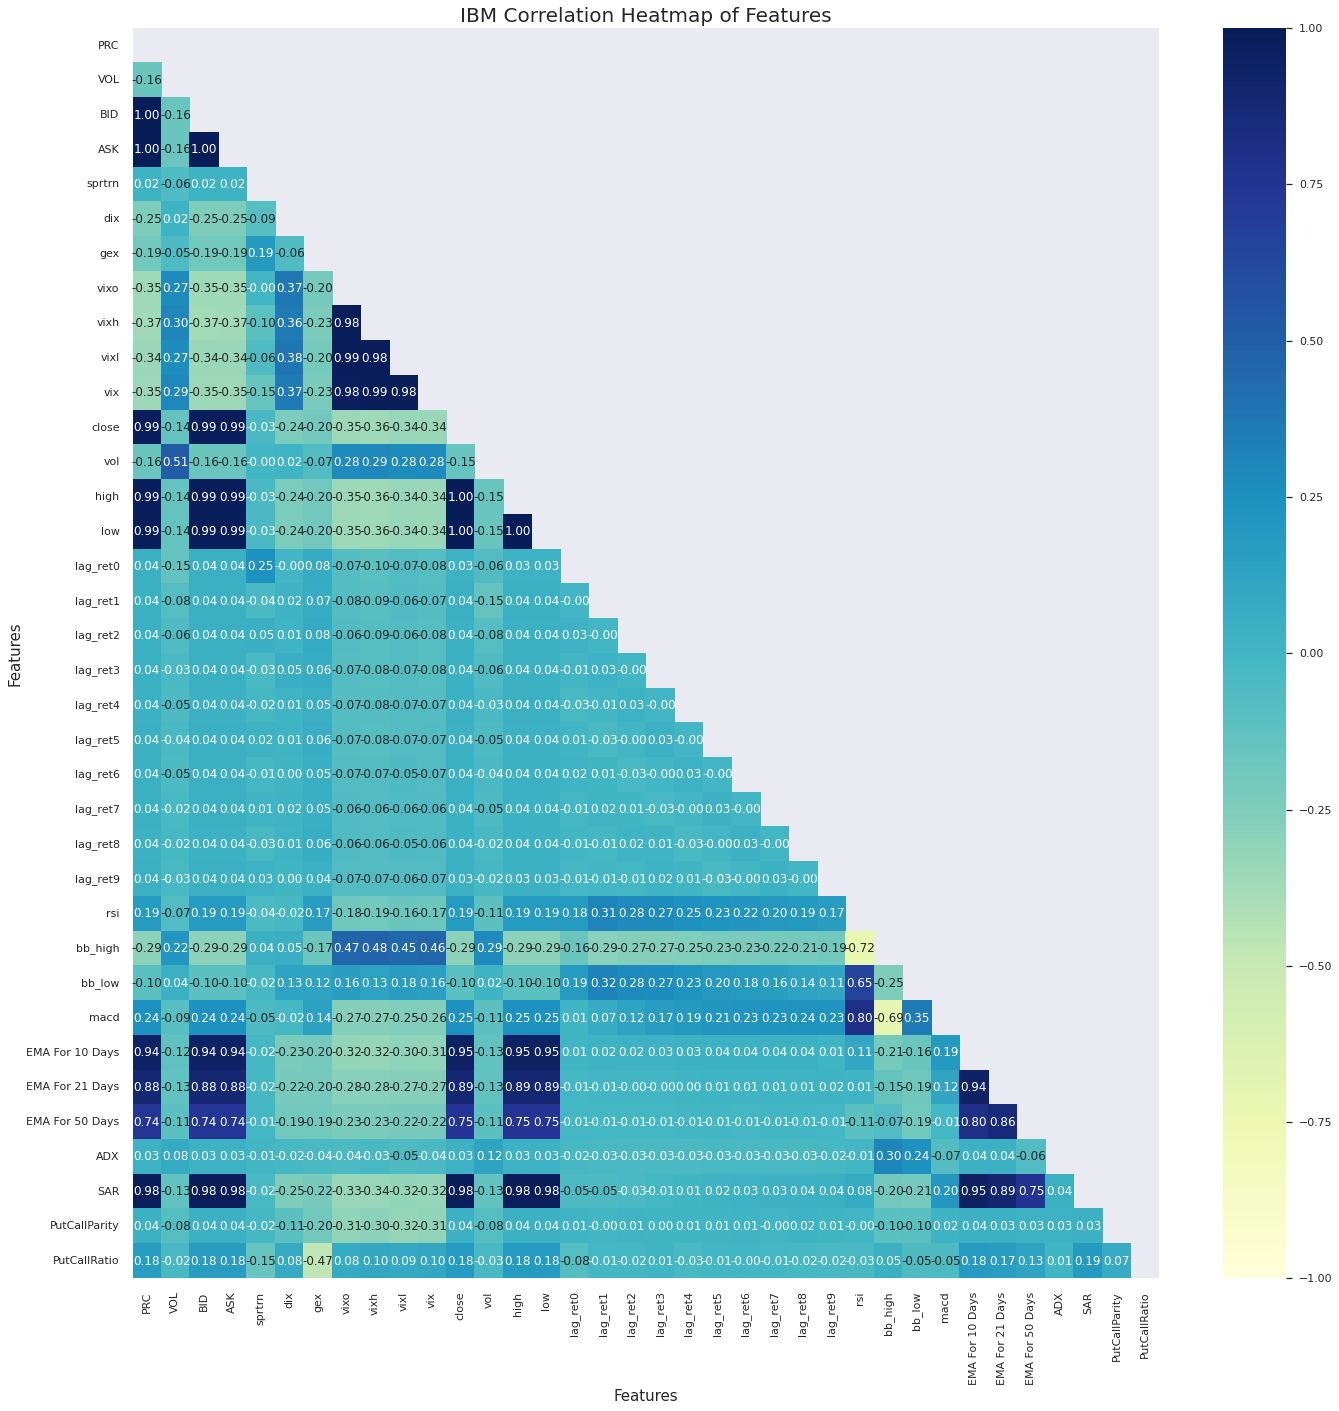

In [ ]:
df_heatmap2 = df_IBM.copy()
df_heatmap2.drop(['RetFut1'],axis=1,inplace=True)

sns.set(rc={'figure.figsize':(23,23)}, font_scale = 1)

mask = np.zeros_like(df_heatmap2.corr()*-1)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_heatmap2.corr(),annot=True,fmt='.2f', vmin=-1,vmax=1,mask=mask,cmap="YlGnBu")


plt.title('IBM Correlation Heatmap of Features', fontsize=20)
plt.xlabel("Features",fontsize=15)
plt.ylabel("Features",fontsize=15)

In [ ]:
# Finding the Highly correlated features above the 0.75 threshold
High_Corr_Features = corr_high_list(df_IBM, 0.75)
# Printing the highly correlated features 
High_Corr_Features


# # Dropping the highly correlated features from the train dataset
# df_IBM = df_IBM.drop(High_Corr_Features, axis =1)

{'ASK',
 'BID',
 'EMA For 10 Days',
 'EMA For 21 Days',
 'EMA For 50 Days',
 'SAR',
 'close',
 'high',
 'low',
 'macd',
 'vix',
 'vixh',
 'vixl'}

The above shows a list of features that are highly correlated to one another. Except for "EMA For 50 Days" all features will be dropped in order to avoid introducing further complexity and noise to the model. The reason why all EMA features are listed above is that all three features explain the same trend in the dataset with subtle differences and hence it makes sense why they would be highly correlated to one another. Since "EMA For 50 Days" has the highest importance with respect to the target variable (as shown further in the code in the bar plot) we will keep this feature and drop the other two ('EMA For 10 Days', 'EMA For 21 Days').

## 1.3 MFST

In [ ]:
df_MFST_All_Features = feature_eng_df[feature_eng_df.TICKER=='MSFT']

### 1.3.A) Handling The Missing Data in the MFST Dataset

We will impute all the missing values in MFST dataframe following the same methods outlined previsouly in the Apple DataFrame

In [ ]:
df_MFST_All_Features['price'].fillna((df_MFST_All_Features['price'].mean()), inplace=True)
df_MFST_All_Features['dix'].fillna((df_MFST_All_Features['dix'].mean()), inplace=True)
df_MFST_All_Features['gex'].fillna((df_MFST_All_Features['gex'].mean()), inplace=True)

df_MFST_All_Features['close'] = df_MFST_All_Features['close'].fillna(0)
df_MFST_All_Features['vol'] = df_MFST_All_Features['vol'].fillna(0)
df_MFST_All_Features['high'] = df_MFST_All_Features['high'].fillna(0)
df_MFST_All_Features['low'] = df_MFST_All_Features['low'].fillna(0)

df_MFST_All_Features['rsi'].fillna((df_MFST_All_Features['rsi'].mean()), inplace=True)
df_MFST_All_Features['bb_high'].fillna((df_MFST_All_Features['bb_high'].mean()), inplace=True)
df_MFST_All_Features['bb_low'].fillna((df_MFST_All_Features['bb_low'].mean()), inplace=True)
df_MFST_All_Features.loc[5662:5686,"macd"] = 0
df_MFST_All_Features.loc[5687:5695,"macd"] = 0.406858
df_MFST_All_Features['EMA For 10 Days'] = df_MFST_All_Features['EMA For 10 Days'].fillna(0)
df_MFST_All_Features['EMA For 21 Days'] = df_MFST_All_Features['EMA For 21 Days'].fillna(0)
df_MFST_All_Features['EMA For 50 Days'] = df_MFST_All_Features['EMA For 50 Days'].fillna(0)
df_MFST_All_Features['ADX'].fillna((df_MFST_All_Features['ADX'].mean()), inplace=True)
df_MFST_All_Features['SAR'].fillna((df_MFST_All_Features['SAR'].mean()), inplace=True)

In [ ]:
# Seeing all the NaN values presented in the DataFrame
df_MFST_All_Features.isnull().sum(axis=0)

TICKER             0
date               0
PRC                0
VOL                0
BID                0
ASK                0
OPENPRC            0
sprtrn             0
price              0
dix                0
gex                0
vixo               0
vixh               0
vixl               0
vix                0
close              0
vol                0
high               0
low                0
lag_ret0           0
lag_ret1           0
lag_ret2           0
lag_ret3           0
lag_ret4           0
lag_ret5           0
lag_ret6           0
lag_ret7           0
lag_ret8           0
lag_ret9           0
rsi                0
bb_high            0
bb_low             0
macd               0
EMA For 10 Days    0
EMA For 21 Days    0
EMA For 50 Days    0
ADX                0
SAR                0
PutCallParity      0
PutCallRatio       0
dtype: int64

### 1.3.B) Finding Feature Correlation


In [ ]:
df_MFST = df_MFST_All_Features.copy()
#Building the regression target to identify the best features through RFE
df_MFST['RetFut1'] = df_MFST['OPENPRC'].pct_change(1).shift(-1).fillna(0)
df_MFST_All_Features['RetFut1'] = df_MFST_All_Features['OPENPRC'].pct_change(1).shift(-1).fillna(0)

df_MFST.drop(["OPENPRC", "price"],axis=1,inplace=True)

print("DataFrame shape:", df_MFST.shape)

df_MFST.head(3)

DataFrame shape: (2831, 39)


TICKER        date      PRC       VOL    BID    ASK    sprtrn      dix  \
5662   MSFT  2011-01-03  27.9800  53613367  27.96  27.97  0.011315  0.42273   
5663   MSFT  2011-01-04  28.0875  54542150  28.04  28.05 -0.001313  0.42273   
5664   MSFT  2011-01-05  28.0000  59012770  27.99  28.00  0.005007  0.42273   

               gex   vixo  ...    bb_low  macd  EMA For 10 Days  \
5662  2.763341e+09  17.94  ...  0.049256   0.0              0.0   
5663  2.763341e+09  17.34  ...  0.049256   0.0              0.0   
5664  2.763341e+09  17.81  ...  0.049256   0.0              0.0   

      EMA For 21 Days  EMA For 50 Days        ADX        SAR  PutCallParity  \
5662              0.0              0.0  22.753218  95.473354    -123.882243   
5663              0.0              0.0  22.753218  95.473354    -124.376356   
5664              0.0              0.0  22.753218  27.960000    -125.143737   

      PutCallRatio   RetFut1  
5662      0.595386 -0.003922  
5663      0.746331 -0.001432  
5664      0.566319  0.005018  

[3 rows x 39 columns]

Text(179.09375, 0.5, 'Features')

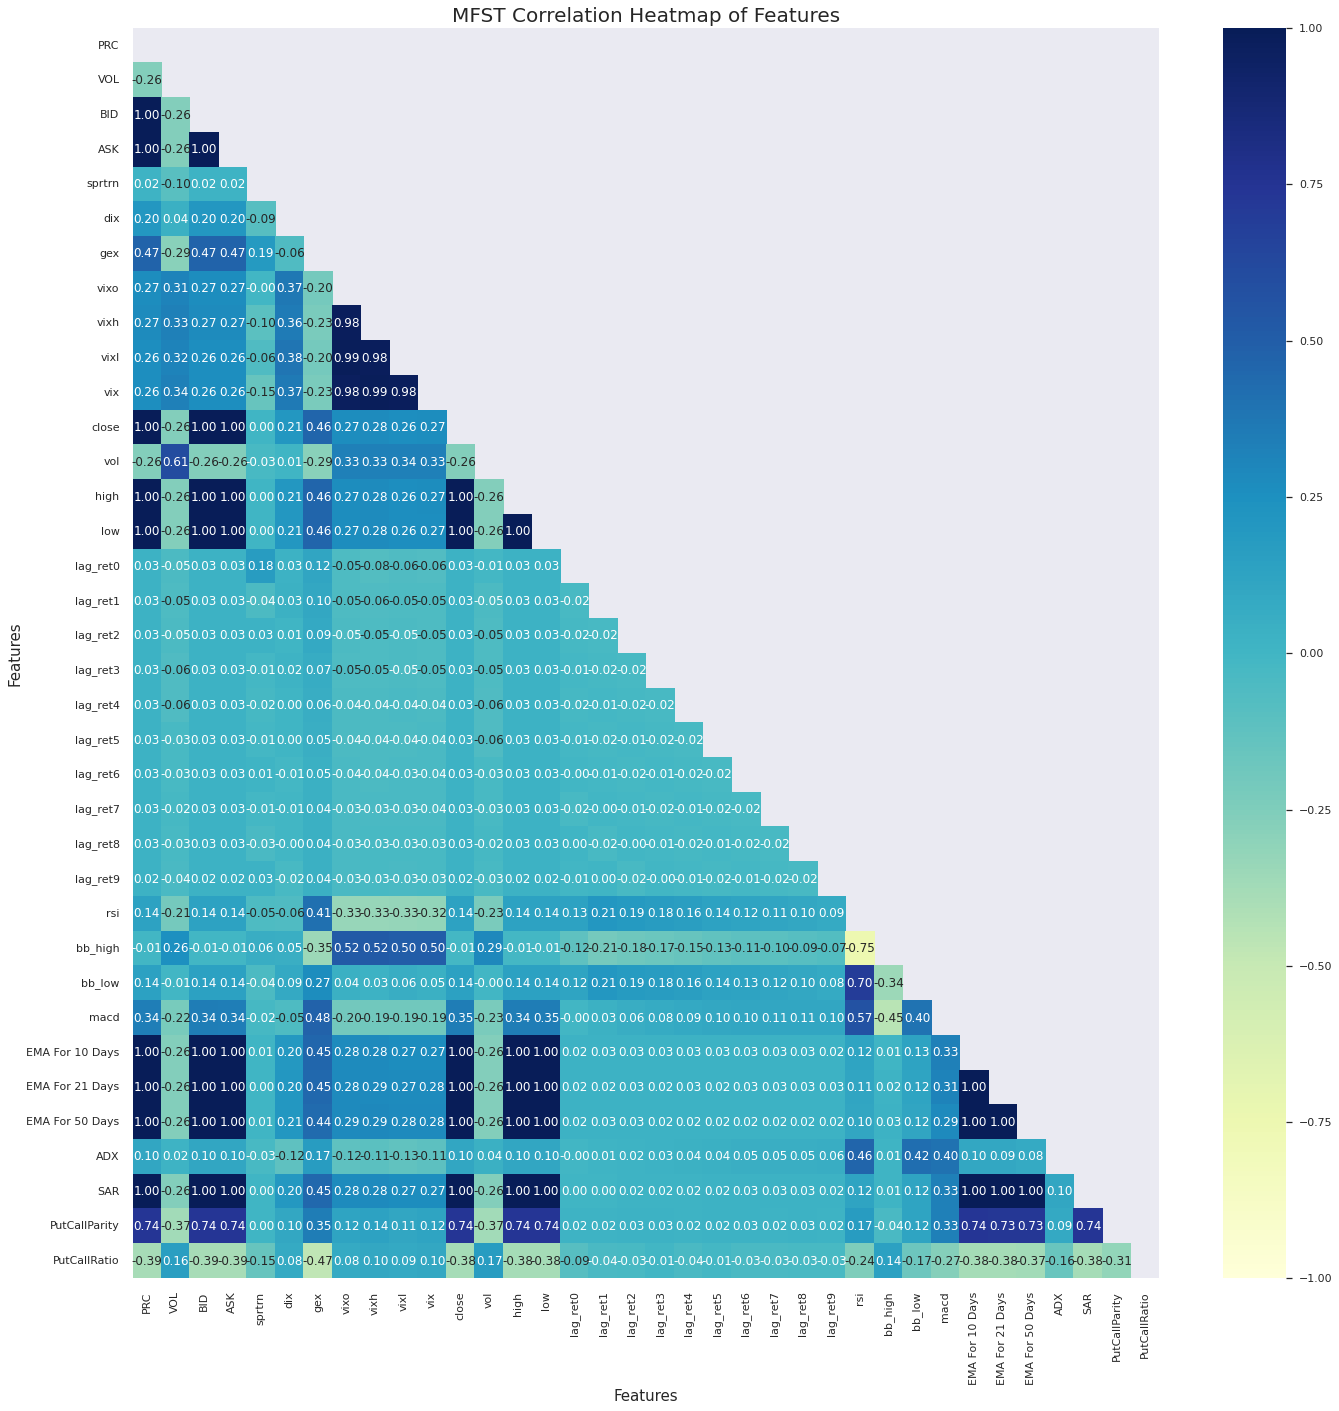

In [ ]:
df_heatmap3 = df_MFST.copy()
df_heatmap3.drop(['RetFut1'],axis=1,inplace=True)

sns.set(rc={'figure.figsize':(23,23)}, font_scale = 1)

mask = np.zeros_like(df_heatmap3.corr()*-1)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_heatmap3.corr(),annot=True,fmt='.2f', vmin=-1,vmax=1,mask=mask,cmap="YlGnBu")


plt.title('MFST Correlation Heatmap of Features', fontsize=20)
plt.xlabel("Features",fontsize=15)
plt.ylabel("Features",fontsize=15)

In [ ]:
# Finding the Highly correlated features above the 0.75 threshold
High_Corr_Features = corr_high_list(df_MFST, 0.75)
# Printing the highly correlated features 
High_Corr_Features

# # Dropping the highly correlated features from the train dataset
# df_MFST = df_MFST.drop(High_Corr_Features, axis =1)

{'ASK',
 'BID',
 'EMA For 10 Days',
 'EMA For 21 Days',
 'EMA For 50 Days',
 'SAR',
 'close',
 'high',
 'low',
 'vix',
 'vixh',
 'vixl'}

# 2. Showing Feature Importance For Each Stock 

Text(0.5, 1.0, 'APPLE Feature Importance')

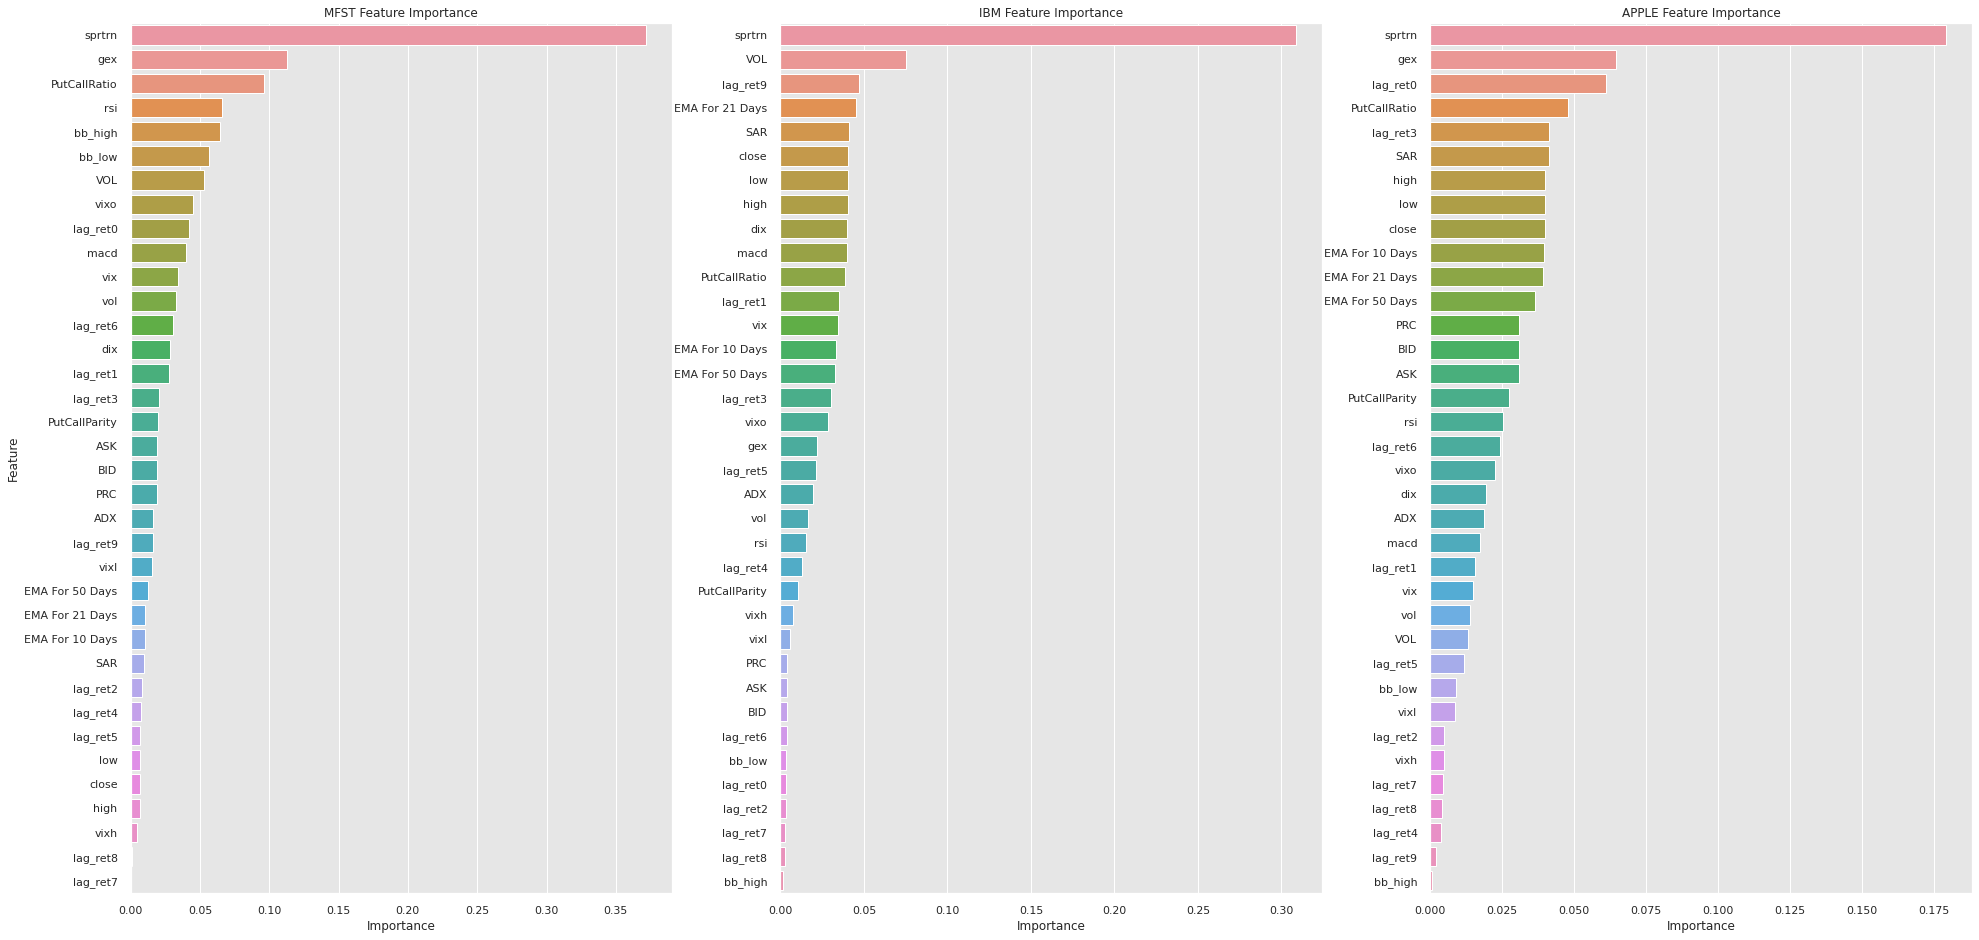

In [ ]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig, axes = plt.subplots(1, 3, figsize=(33, 16))


####------------------------ FEATURE IMPORTANCE PLOT FOR MFST ------------------------#### 
cor_matrix = df_MFST.corr()
cor_features = df_MFST.index
#Correlation with output variable
cor = abs(cor_matrix['RetFut1'])
cor=pd.DataFrame({'features':cor.index,'corr':cor.values})
cor=cor.sort_values(by='corr',ascending=False)
cor.reset_index(inplace=True,drop=True)

#Plotting the features
sns.barplot(ax=axes[0], y='features',x='corr',data=cor[1:]) 
axes[0].set_ylabel("Feature")
axes[0].set_xlabel("Importance")
axes[0].set_title('MFST Feature Importance')


####------------------------ FEATURE IMPORTANCE PLOT FOR IBM ------------------------#### 

cor_matrix = df_IBM.corr()
cor_features = df_IBM.index
#Correlation with output variable
cor = abs(cor_matrix['RetFut1'])
cor=pd.DataFrame({'features':cor.index,'corr':cor.values})
cor=cor.sort_values(by='corr',ascending=False)
cor.reset_index(inplace=True,drop=True)

#Plotting the features
sns.set_theme(style='whitegrid')
sns.barplot(ax=axes[1], y='features',x='corr',data=cor[1:]) 
axes[1].set_ylabel("")
axes[1].set_xlabel("Importance")
axes[1].set_title('IBM Feature Importance')


####------------------------ FEATURE IMPORTANCE PLOT FOR APPLE ------------------------#### 

cor_matrix = df_App.corr()
cor_features = df_App.index
#Correlation with output variable
cor = abs(cor_matrix['RetFut1'])
cor=pd.DataFrame({'features':cor.index,'corr':cor.values})
cor=cor.sort_values(by='corr',ascending=False)
cor.reset_index(inplace=True,drop=True)

#Plotting the features
sns.set_theme(style='whitegrid')
sns.barplot(ax=axes[2], y='features',x='corr',data=cor[1:]) 
axes[2].set_ylabel("")
axes[2].set_xlabel("Importance")
axes[2].set_title('APPLE Feature Importance')

# 3. Feature Selection using Recursive Feature Elimination(RFE):

## 3.1 APPLE: 

In [ ]:
from scipy.stats import spearmanr
def information_coefficient(y_true, y_pred):
    rho, pval = spearmanr(y_true,y_pred) #spearman's rank correlation
    return rho

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn import metrics

# Splitting the data
df_App_All_Features['Year'] = pd.DatetimeIndex(df_App_All_Features['date']).year
X_train = df_App_All_Features[(df_App_All_Features.Year.isin([2011,2012,2013,2014,2015,2016,2017,2018,2019]))]
Y_train= X_train[['RetFut1']]

X_test = df_App_All_Features[(df_App_All_Features.Year.isin([2020,2021,2022]))]
Y_test = X_test['RetFut1']


X_train.drop(['Year', "OPENPRC", "price",'EMA For 10 Days','EMA For 21 Days','PutCallParity','SAR','close','high','low','macd','vix','vixh','vixl','TICKER','date','RetFut1'],axis=1,inplace=True)
X_test.drop(['Year', "OPENPRC", "price",'EMA For 10 Days','EMA For 21 Days','PutCallParity','SAR','close','high','low','macd','vix','vixh','vixl','TICKER','date','RetFut1'],axis=1,inplace=True)

#Iniating the model
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 1)

# Use RFE to delete the feature with the least importance
# Here I am looping through all the features and finding the the most optimal amount of features.
# This way I can be sure that the selected number of important features is the optimum.

Performance_Train_list = []
Performance_Test_list = []
for i in range (1, X_train.shape[1]+1):
    rfe_tree = RFE(estimator = model_rf, n_features_to_select = i, step = 1) 
    rfe_tree.fit(X_train, Y_train)

    # Finding the accurarcy of the model 
    y_pred_train = rfe_tree.predict(X_train)
    y_pred_test = rfe_tree.predict(X_test)

    Info_Coeff_train = information_coefficient(Y_train, y_pred_train)
    Performance_Train_list.append(Info_Coeff_train)

    Info_Coeff_test =  information_coefficient(Y_test, y_pred_test)
    Performance_Test_list.append(Info_Coeff_test)

print ("The Best Performance is:" , max(Performance_Test_list))
print ("The Best Performance Corresponds To", (Performance_Test_list.index(max(Performance_Test_list))+1),"number of features")

The Best Performance is: 0.39414362105100176
The Best Performance Corresponds To 18 number of features


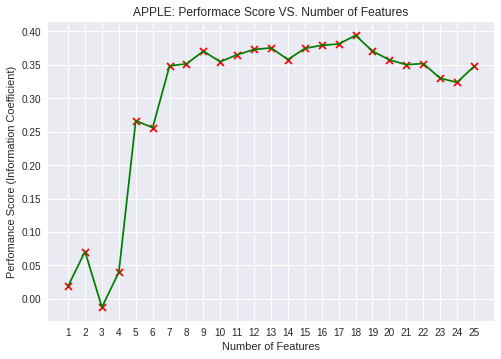

In [ ]:
# Plotting the peformance vs. the number of features 
Num_Feat = list(range(len(X_train.columns)))

plt.style.use("seaborn")
plt.grid(True)
plt.scatter(Num_Feat, Performance_Test_list, color="red", marker="x")
plt.plot(Num_Feat, Performance_Test_list, color="green", marker="x")

plt.title("APPLE: Performace Score VS. Number of Features")
plt.xlabel('Number of Features')
plt.ylabel('Perfomance Score (Information Coefficient)')

plt.xticks(np.arange(len(X_train.columns)), np.arange(1, len(X_train.columns)+1))
plt.show()

In [ ]:
# Finding all the features using the founded optimize number of features from above
rfe_tree = RFE(estimator = model_rf, n_features_to_select = 18, step = 1) 
rfe_tree.fit_transform(X_train, Y_train)

# Returns a boolean list with "TRUE" for the features 
rfe_tree.get_support()
# Finding the number of selected features:
Optimal_Feature = [column for column in X_train.columns if column in X_train.columns[rfe_tree.get_support()]]

# Printing the list of the most important features 
Optimal_Feature

['PRC',
 'VOL',
 'BID',
 'ASK',
 'sprtrn',
 'dix',
 'gex',
 'vixo',
 'lag_ret0',
 'lag_ret1',
 'lag_ret2',
 'lag_ret3',
 'lag_ret6',
 'lag_ret7',
 'rsi',
 'EMA For 50 Days',
 'ADX',
 'PutCallRatio']

## 3.2 IBM:

In [ ]:
df_IBM_All_Features['Year'] = pd.DatetimeIndex(df_IBM_All_Features['date']).year

# Splitting the data
X_train = df_IBM_All_Features[(df_IBM_All_Features.Year.isin([2011,2012,2013,2014,2015,2016,2017,2018,2019]))]
Y_train= X_train['RetFut1']

X_test = df_IBM_All_Features[(df_IBM_All_Features.Year.isin([2020,2021,2022]))]
Y_test = X_test['RetFut1']


X_train.drop(['RetFut1', 'Year', 'ASK',"BID", "OPENPRC", "price",'EMA For 10 Days','EMA For 21 Days',"SAR","close",'high','low','macd','vix','vixh','vixl','TICKER','date'],axis=1,inplace=True)
X_test.drop(['RetFut1', 'Year', 'ASK',"BID", "OPENPRC", "price",'EMA For 10 Days','EMA For 21 Days',"SAR","close",'high','low','macd','vix','vixh','vixl','TICKER','date'],axis=1,inplace=True)

#Iniating the model
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 1052)

# Use RFE to delete the feature with the least importance
# Here I am looping through all the features and finding the the most optimal amount of features.
# This way I can be sure that the selected number of important features is the optimum.

Performance_Train_list = []
Performance_Test_list = []
for i in range (1, X_train.shape[1]+1):
    rfe_tree = RFE(estimator = model_rf, n_features_to_select = i, step = 1) 
    rfe_tree.fit(X_train, Y_train)

    # Finding the accurarcy of the model 
    y_pred_train = rfe_tree.predict(X_train)
    y_pred_test = rfe_tree.predict(X_test)

    Info_Coeff_train = information_coefficient(Y_train, y_pred_train)
    Performance_Train_list.append(Info_Coeff_train)

    Info_Coeff_test = information_coefficient(Y_test, y_pred_test)
    Performance_Test_list.append(Info_Coeff_test)

print ("The Best Performance is:" , max(Performance_Test_list))
print ("The Best Performance Corresponds To", (Performance_Test_list.index(max(Performance_Test_list))+1),"number of features")

The Best Performance is: 0.2924963781592904
The Best Performance Corresponds To 7 number of features


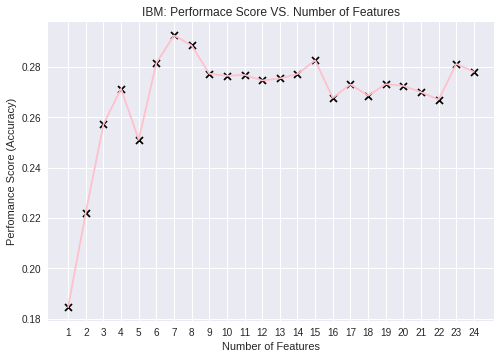

In [ ]:
# Plotting the peformance vs. the number of features 
Num_Feat = list(range(len(X_train.columns)))

plt.style.use("seaborn")
plt.grid(True)

plt.plot(Num_Feat, Performance_Test_list, color="pink", marker="x")
plt.scatter(Num_Feat, Performance_Test_list, color="black", marker="x")


plt.title("IBM: Performace Score VS. Number of Features")
plt.xlabel('Number of Features')
plt.ylabel('Perfomance Score (Accuracy)')

plt.xticks(np.arange(len(X_train.columns)), np.arange(1, len(X_train.columns)+1))
plt.show()

In [ ]:
# Finding all the features using the founded optimize number of features from above
rfe_tree = RFE(estimator = model_rf, n_features_to_select = 7, step = 1) 
rfe_tree.fit_transform(X_train, Y_train)

# Returns a boolean list with "TRUE" for the features 
rfe_tree.get_support()
# Finding the number of selected features:
Optimal_Feature = [column for column in X_train.columns if column in X_train.columns[rfe_tree.get_support()]]

# Printing the list of the most important features 
Optimal_Feature

['VOL', 'sprtrn', 'gex', 'vixo', 'lag_ret0', 'lag_ret5', 'EMA For 50 Days']

## 3.3 MFST:

In [ ]:
df_MFST_All_Features['Year'] = pd.DatetimeIndex(df_MFST_All_Features['date']).year

# Splitting the data
X_train = df_MFST_All_Features[(df_MFST_All_Features.Year.isin([2011,2012,2013,2014,2015,2016,2017,2018,2019]))]
Y_train= X_train['RetFut1']

X_test = df_MFST_All_Features[(df_MFST_All_Features.Year.isin([2020,2021,2022]))]
Y_test = X_test['RetFut1']


X_train.drop(['RetFut1', 'Year', "ASK", "BID", 'SAR', "OPENPRC", "price",'EMA For 10 Days','EMA For 21 Days',"close",'high','low','vix','vixh','vixl','TICKER','date'],axis=1,inplace=True)
X_test.drop(['RetFut1', 'Year', "ASK", "BID", 'SAR', "OPENPRC", "price",'EMA For 10 Days','EMA For 21 Days',"close",'high','low','vix','vixh','vixl','TICKER','date'],axis=1,inplace=True)

#Iniating the model
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 1052) 

# Use RFE to delete the feature with the least importance
# Here I am looping through all the features and finding the the most optimal amount of features.
# This way I can be sure that the selected number of important features is the optimum.

Performance_Train_list = []
Performance_Test_list = []
for i in range (1,  X_train.shape[1]+1):
    rfe_tree = RFE(estimator = model_rf, n_features_to_select = i, step = 1) 
    rfe_tree.fit(X_train, Y_train)

    # Finding the accurarcy of the model 
    y_pred_train = rfe_tree.predict(X_train)
    y_pred_test = rfe_tree.predict(X_test)

    Info_Coeff_train = information_coefficient (Y_train, y_pred_train )
    Performance_Train_list.append(Info_Coeff_train)

    Info_Coeff_test = information_coefficient (Y_test, y_pred_test)
    Performance_Test_list.append(Info_Coeff_test)

print ("The Best Performance is:" , max(Performance_Test_list))
print ("The Best Performance Corresponds To", (Performance_Test_list.index(max(Performance_Test_list))+1),"number of features")

The Best Performance is: 0.4805296982873833
The Best Performance Corresponds To 25 number of features


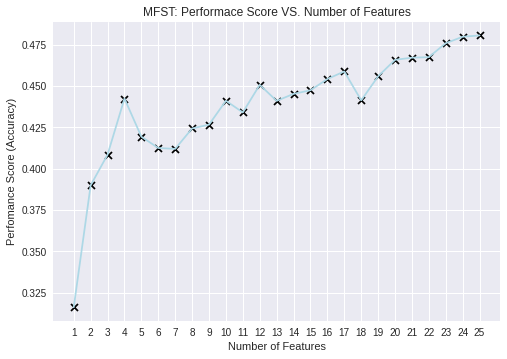

In [ ]:
# Plotting the peformance vs. the number of features 

Num_Feat = list(range(len(X_train.columns)))

plt.style.use("seaborn")
plt.grid(True)

plt.plot(Num_Feat, Performance_Test_list, color="lightblue", marker="x")
plt.scatter(Num_Feat, Performance_Test_list, color="black", marker="x")


plt.title("MFST: Performace Score VS. Number of Features")
plt.xlabel('Number of Features')
plt.ylabel('Perfomance Score (Accuracy)')
plt.xticks(np.arange(len(X_train.columns)), np.arange(1, len(X_train.columns)+1))

plt.show()

In [ ]:
# Finding all the features using the founded optimize number of features from above
rfe_tree = RFE(estimator = model_rf, n_features_to_select = 25, step = 1) 
rfe_tree.fit_transform(X_train, Y_train)

# Returns a boolean list with "TRUE" for the features 
rfe_tree.get_support()
# Finding the number of selected features:
Optimal_Feature = [column for column in X_train.columns if column in X_train.columns[rfe_tree.get_support()]]

# Printing the list of the most important features 
Optimal_Feature

['PRC',
 'VOL',
 'sprtrn',
 'dix',
 'gex',
 'vixo',
 'vol',
 'lag_ret0',
 'lag_ret1',
 'lag_ret2',
 'lag_ret3',
 'lag_ret4',
 'lag_ret5',
 'lag_ret6',
 'lag_ret7',
 'lag_ret8',
 'lag_ret9',
 'rsi',
 'bb_high',
 'bb_low',
 'macd',
 'EMA For 50 Days',
 'ADX',
 'PutCallParity',
 'PutCallRatio']

## 3.4 Final Optimal Features:

In [ ]:
# The Opotimal featueres for all 3 stocks are:
Opt_Features_all_stock = ['TICKER','date', "OPENPRC", 'PRC', 'vol', 'sprtrn', 'dix', 'gex', 'vixo', 'lag_ret0', 'lag_ret1', 'lag_ret2', 'lag_ret3', 'lag_ret4', 'lag_ret5', 'lag_ret6', 'lag_ret7', 'lag_ret8', 'lag_ret9', 'rsi', 'bb_high', 'bb_low', 'macd', 'EMA For 50 Days', 'ADX', 'PutCallParity', 'PutCallRatio', 'BID', 'ASK', "RetFut1"]

# The list above encompasses all the end features selected for each stock
# Please note we included the Ticker, date, and RetFut1 columns as we need these columns later on in the modelling step

In [ ]:
# Slicing the 3 DataFrames for the Opotimal featueres
df_App_All_Features = df_App_All_Features.loc[:, Opt_Features_all_stock]
df_IBM_All_Features = df_IBM_All_Features.loc[:, Opt_Features_all_stock]
df_MFST_All_Features = df_MFST_All_Features.loc[:, Opt_Features_all_stock]

In [ ]:
# Concatenating All the DataFraems 
List_od_DataFrames = [df_App_All_Features,df_IBM_All_Features, df_MFST_All_Features]
Complete_DataFrame = pd.concat(List_od_DataFrames)

In [ ]:
Complete_DataFrame.head(3)

TICKER        date    OPENPRC        PRC         vol    sprtrn      dix  \
0   AAPL  2011-01-03  325.64001  329.57001         0.0  0.011315  0.42273   
1   AAPL  2011-01-04  332.44000  331.29001  16438280.0 -0.001313  0.42273   
2   AAPL  2011-01-05  329.54999  334.00000  11444072.0  0.005007  0.42273   

            gex   vixo  lag_ret0  ...   bb_high    bb_low  macd  \
0  2.763341e+09  17.94  0.000000  ...  0.049518  0.070503   0.0   
1  2.763341e+09  17.34  0.020882  ...  0.049518  0.070503   0.0   
2  2.763341e+09  17.81 -0.008693  ...  0.049518  0.070503   0.0   

   EMA For 50 Days        ADX  PutCallParity  PutCallRatio        BID  \
0              0.0  27.808766     177.707767      0.595386  329.70999   
1              0.0  27.808766     178.826154      0.746331  331.29001   
2              0.0  27.808766     180.856263      0.566319  333.97000   

         ASK   RetFut1  
0  329.72000  0.020882  
1  331.29999 -0.008693  
2  334.00000  0.015685  

[3 rows x 30 columns]

In [ ]:
# Exporting the cleaned DataFrame with the final features to be used in the data modelling notebook
Complete_DataFrame.to_csv("Complete_DataFrame.csv")

# 4. Exploratory Data Analysis


We performed the following EDA to determine whether to complete feature tuning (i.e, feature smoothing) over the features of our dataset.

In [ ]:
req_cols = Opt_Features_all_stock
req_cols

['TICKER',
 'date',
 'OPENPRC',
 'PRC',
 'vol',
 'sprtrn',
 'dix',
 'gex',
 'vixo',
 'lag_ret0',
 'lag_ret1',
 'lag_ret2',
 'lag_ret3',
 'lag_ret4',
 'lag_ret5',
 'lag_ret6',
 'lag_ret7',
 'lag_ret8',
 'lag_ret9',
 'rsi',
 'bb_high',
 'bb_low',
 'macd',
 'EMA For 50 Days',
 'ADX',
 'PutCallParity',
 'PutCallRatio',
 'BID',
 'ASK',
 'RetFut1']

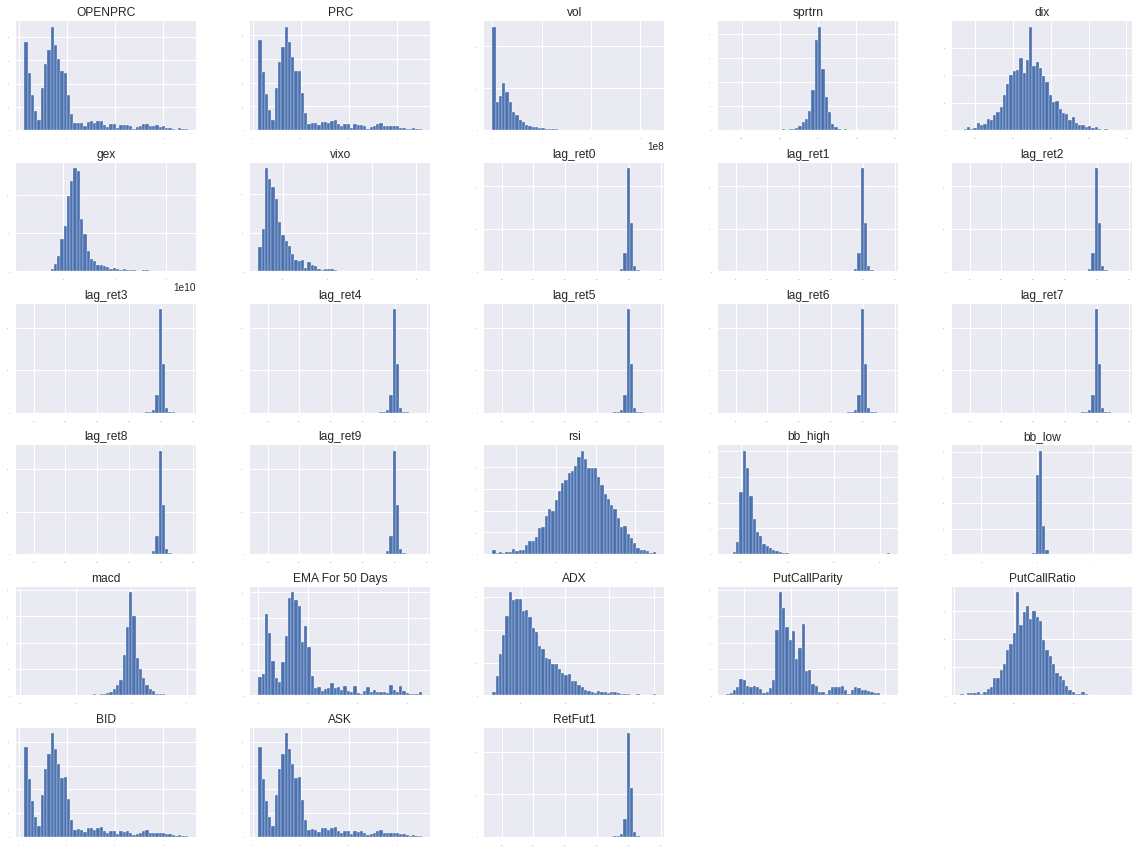

In [ ]:
# Plotting histogram for the features 
Complete_DataFrame[req_cols].hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(20,15))
pyplot.show()

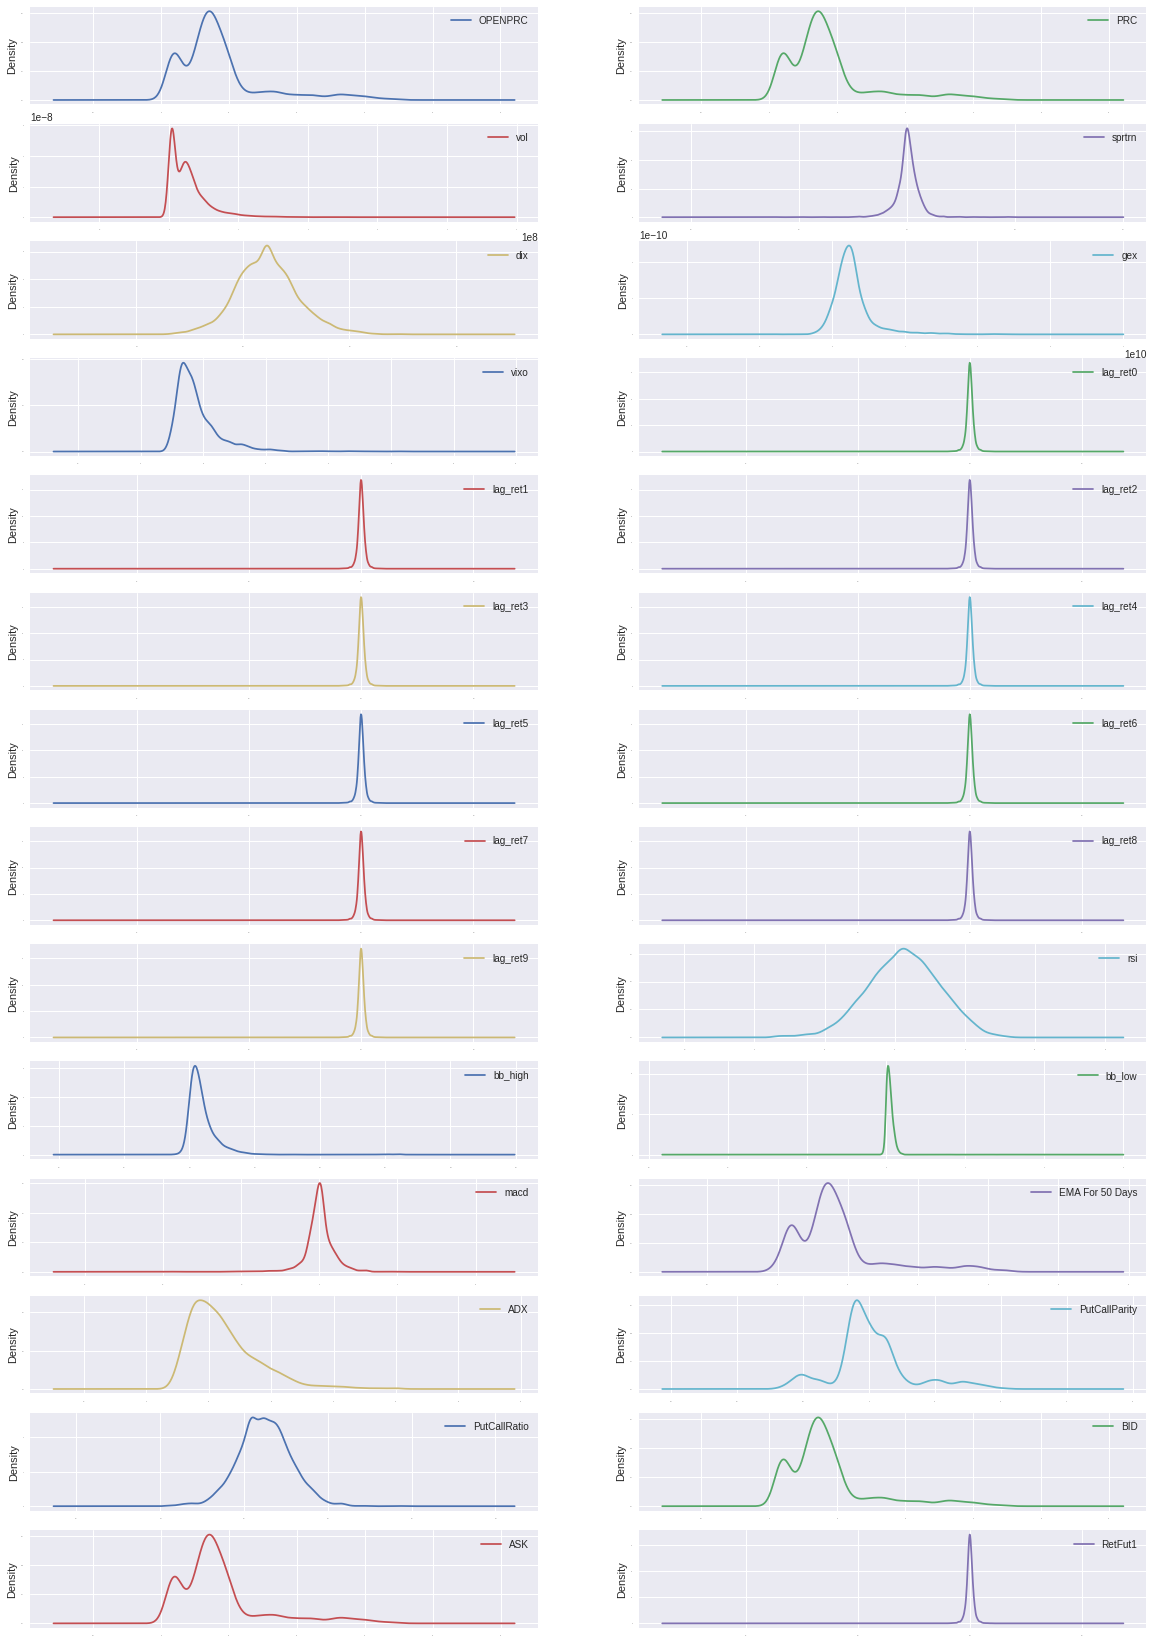

In [ ]:
Complete_DataFrame[req_cols].plot(kind='density', subplots=True, layout=(28,2), sharex=False, legend=True, fontsize=1, figsize=(20,60))
pyplot.show()

**Except for features like vol, close and PutCallParity features which have very minimal noise the rest of the key features have no noise in the data.**

Seasonal decomposition of the feature: OPENPRC


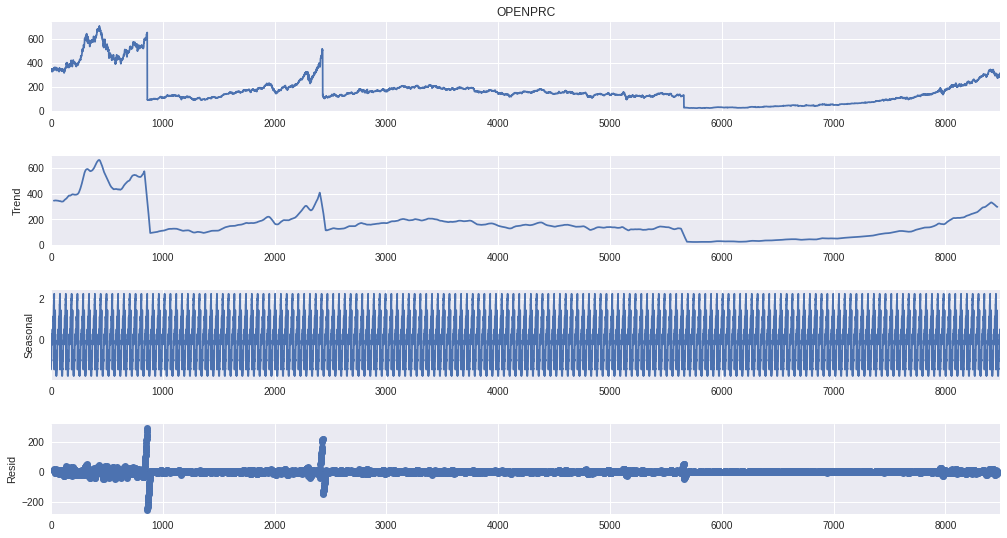

Seasonal decomposition of the feature: PRC


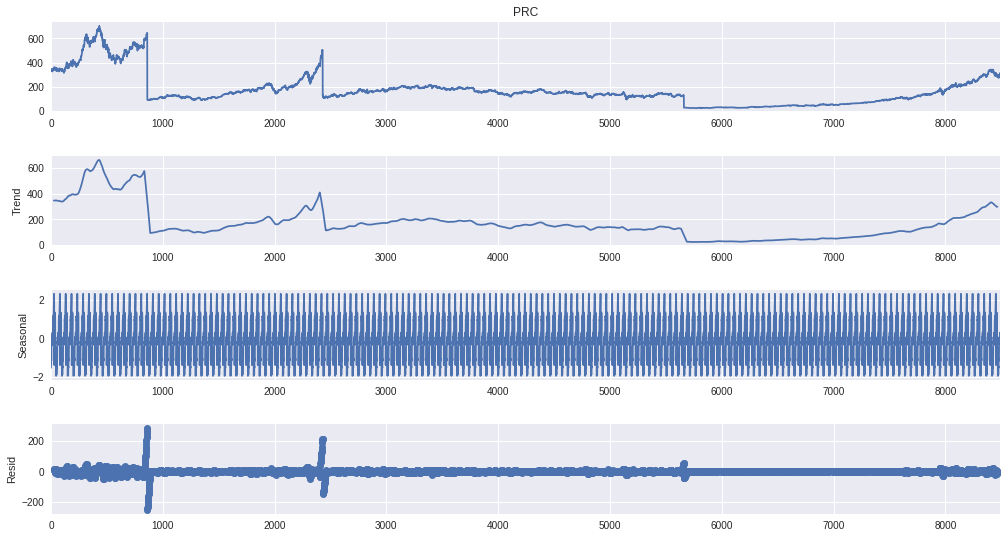

Seasonal decomposition of the feature: vol


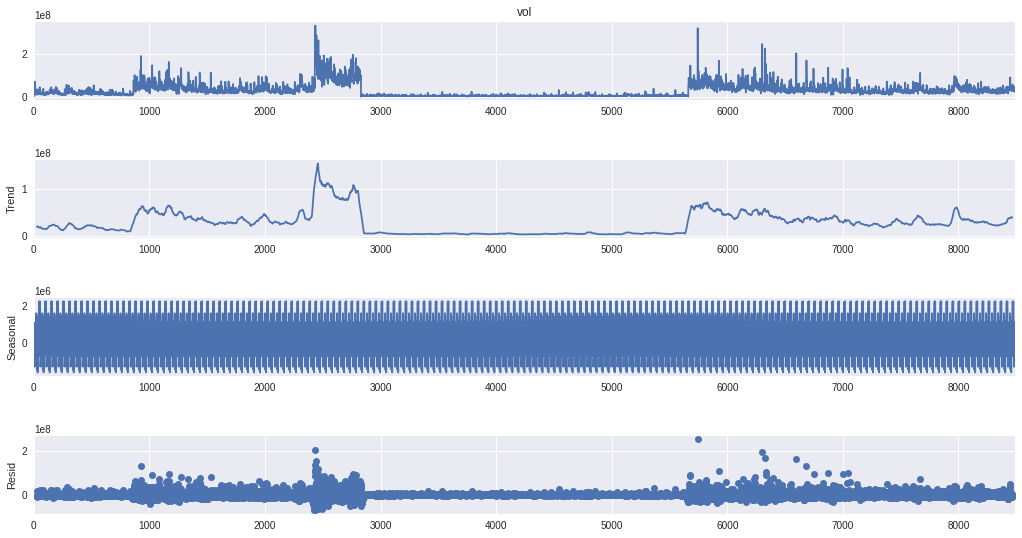

Seasonal decomposition of the feature: sprtrn


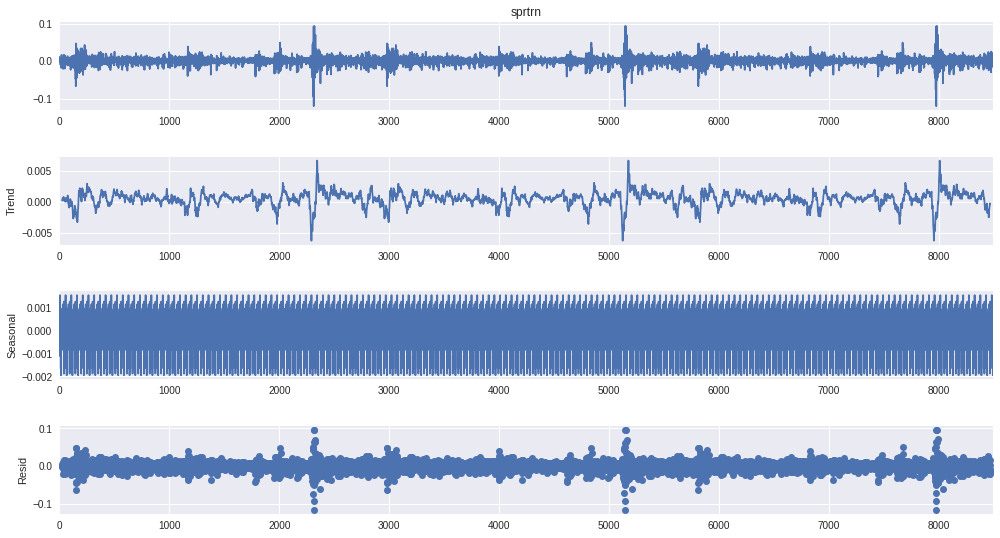

Seasonal decomposition of the feature: dix


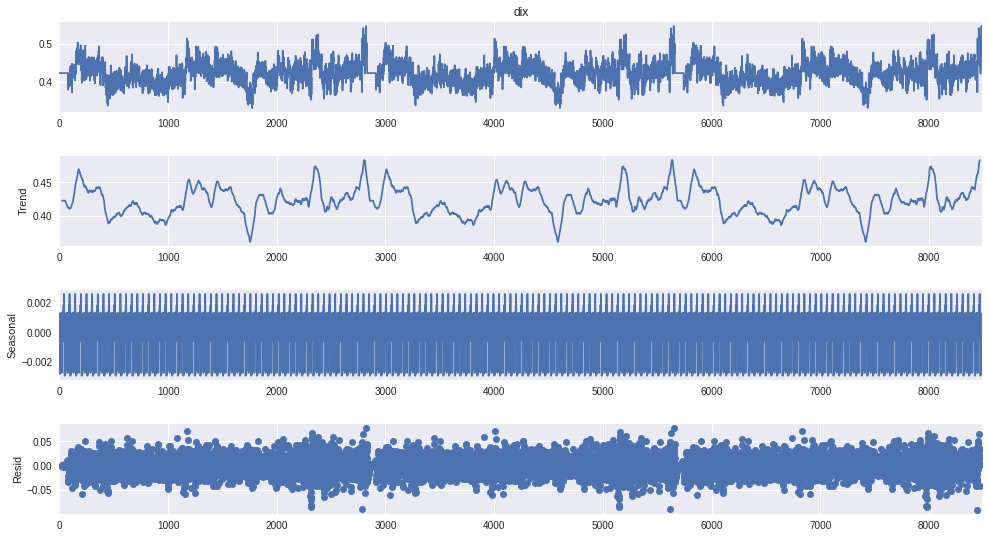

Seasonal decomposition of the feature: gex


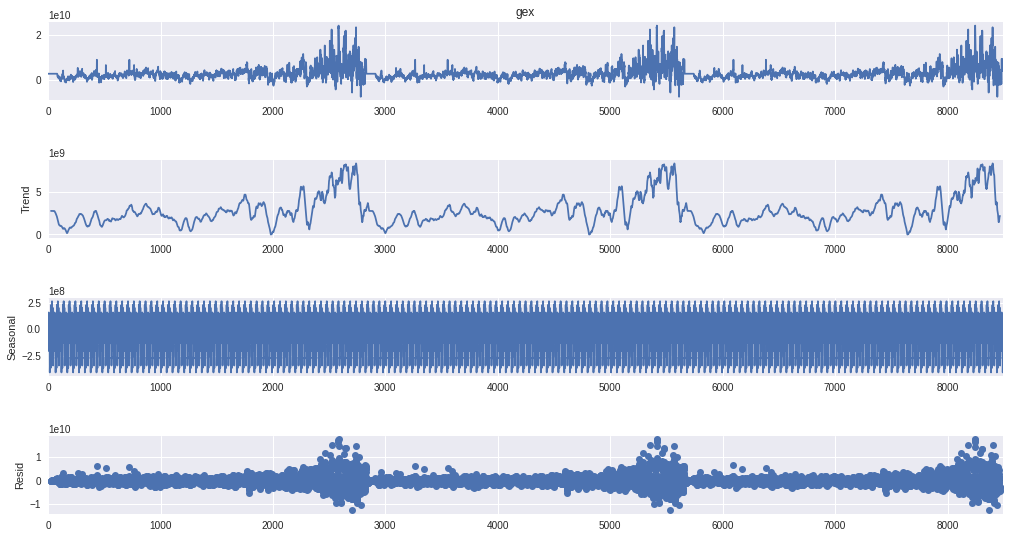

Seasonal decomposition of the feature: vixo


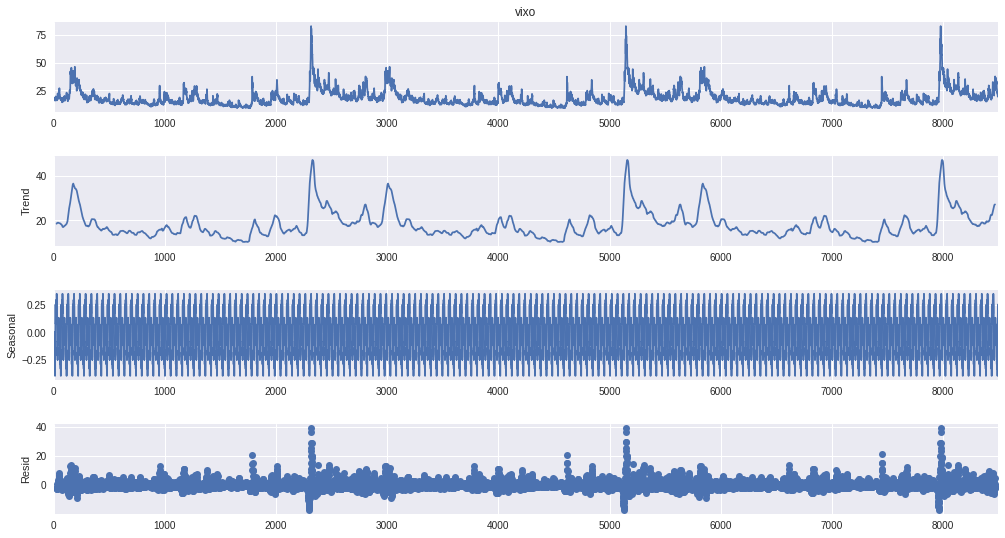

Seasonal decomposition of the feature: lag_ret0


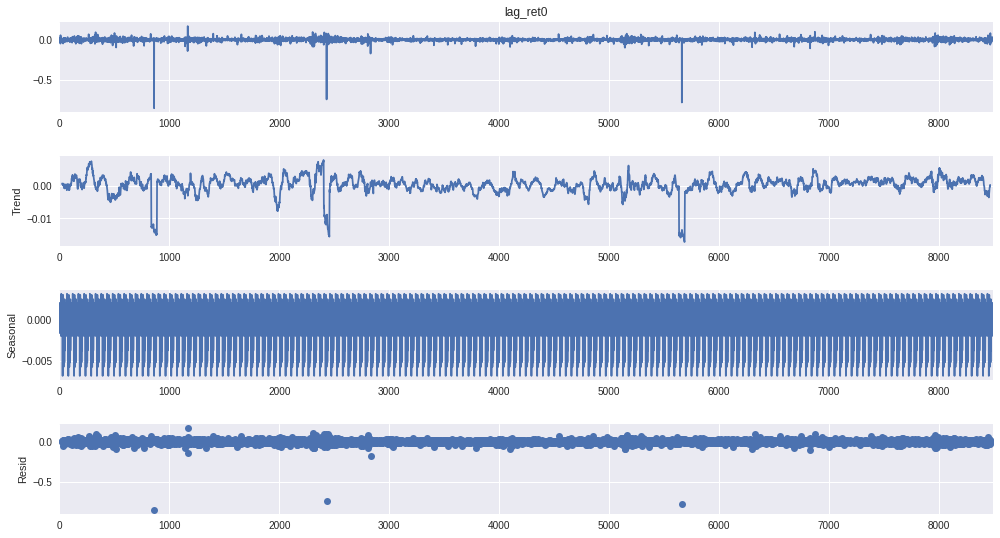

Seasonal decomposition of the feature: lag_ret1


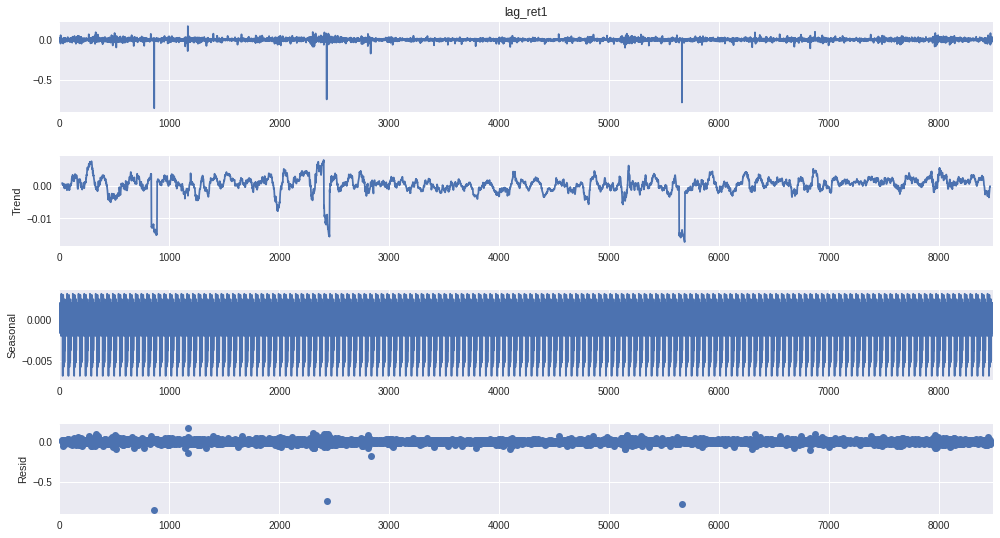

Seasonal decomposition of the feature: lag_ret2


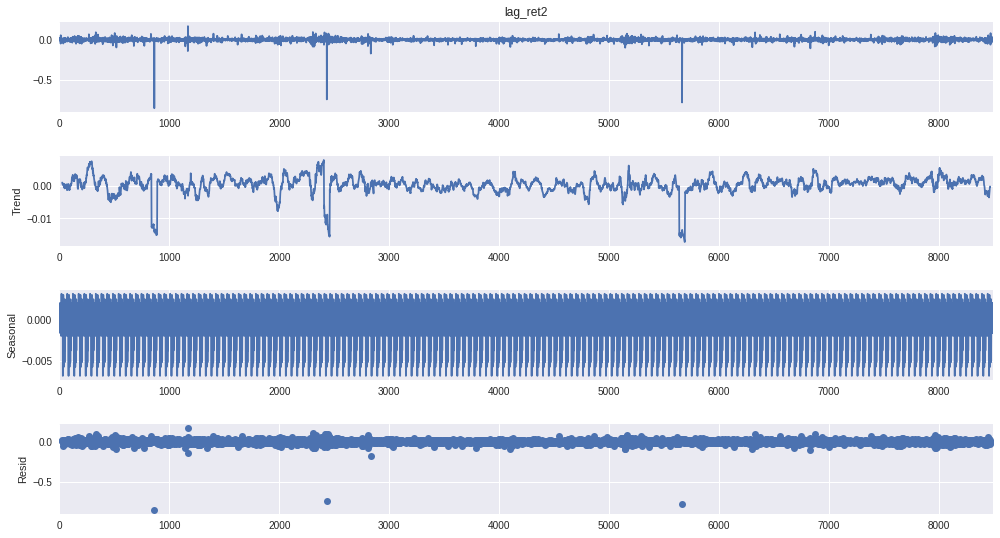

Seasonal decomposition of the feature: lag_ret3


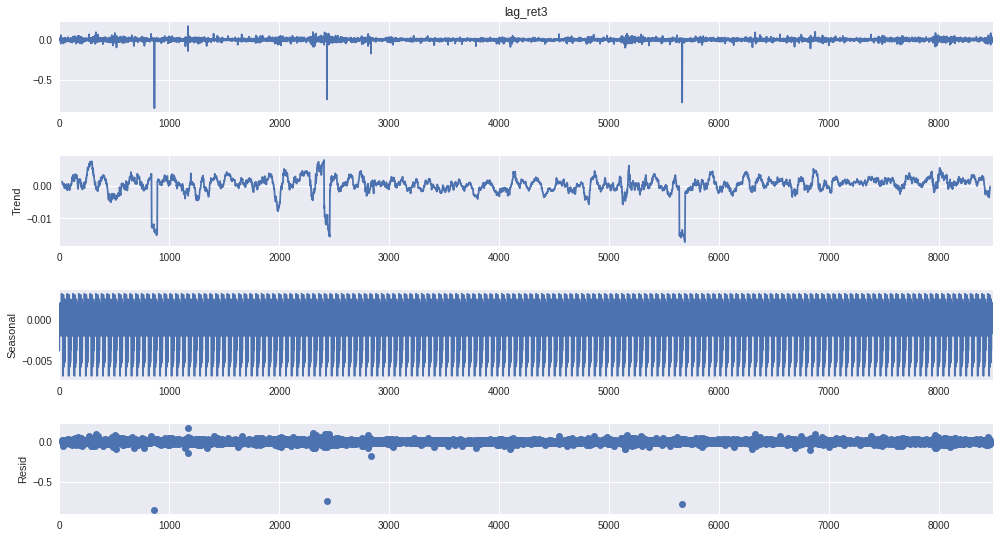

Seasonal decomposition of the feature: lag_ret4


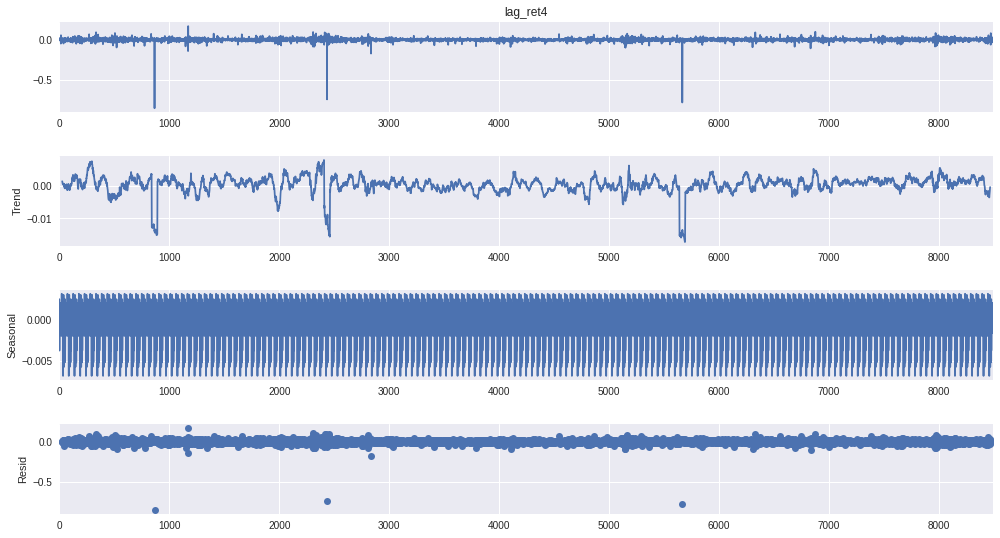

Seasonal decomposition of the feature: lag_ret5


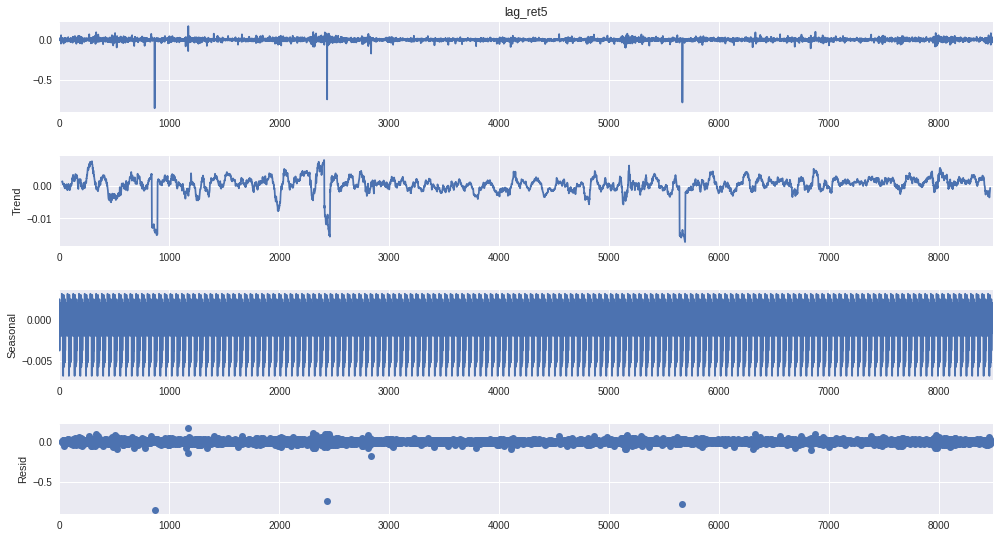

Seasonal decomposition of the feature: lag_ret6


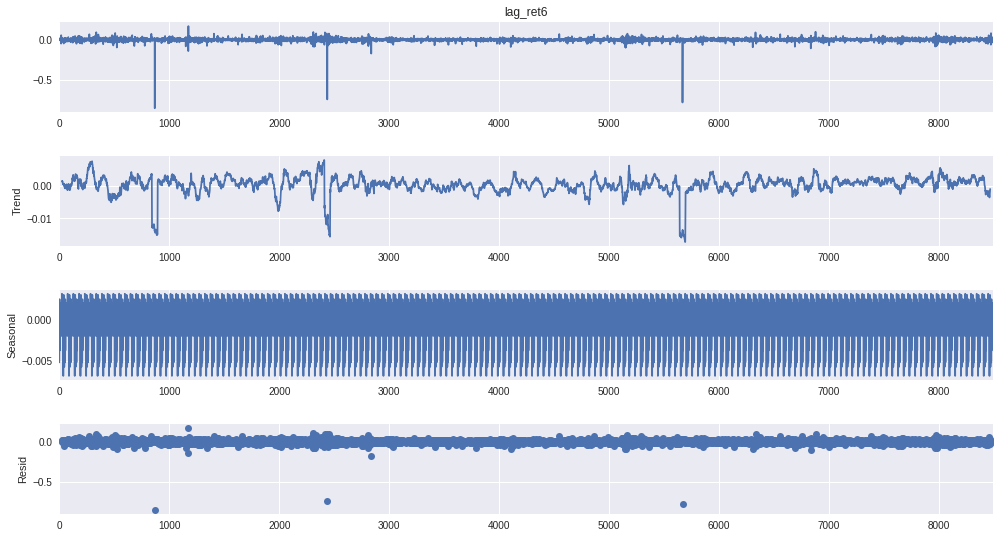

Seasonal decomposition of the feature: lag_ret7


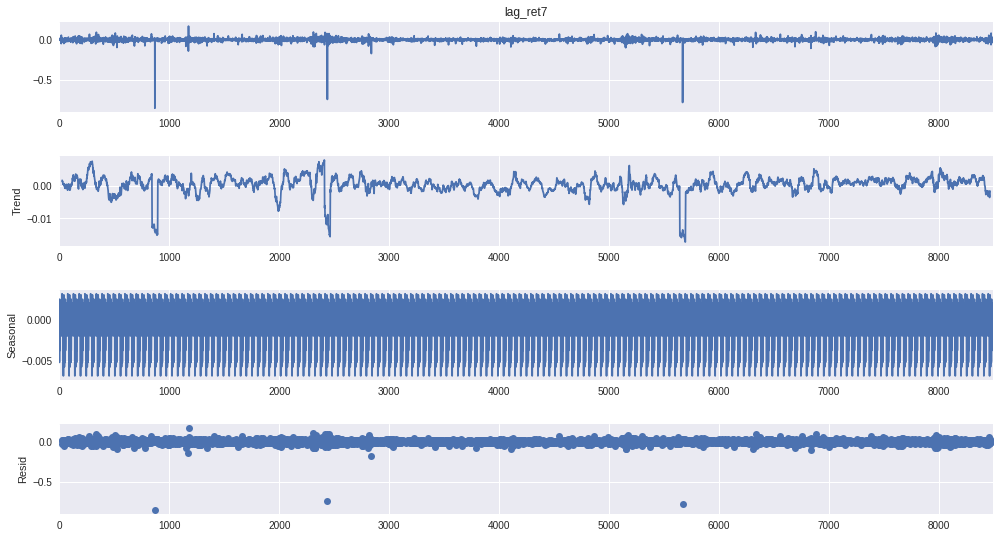

Seasonal decomposition of the feature: lag_ret8


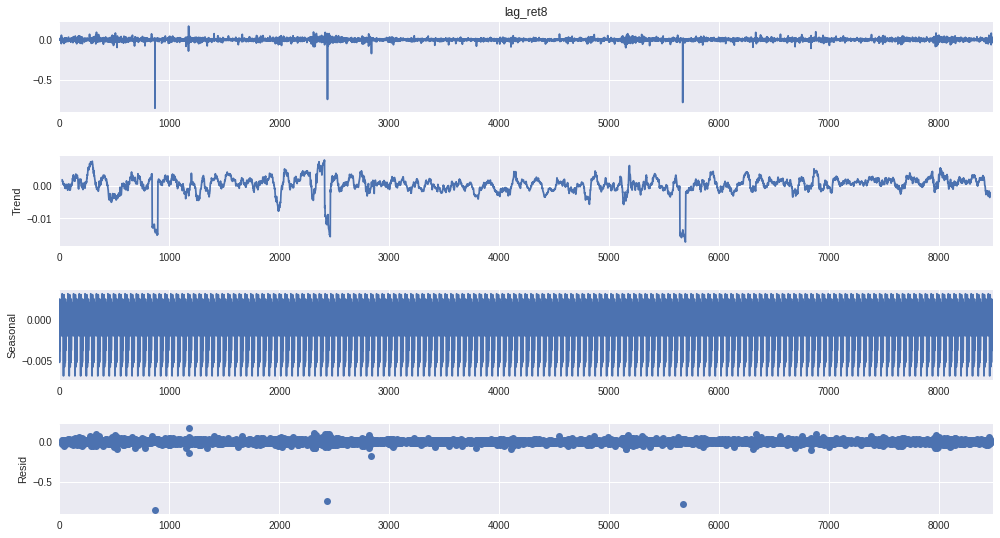

Seasonal decomposition of the feature: lag_ret9


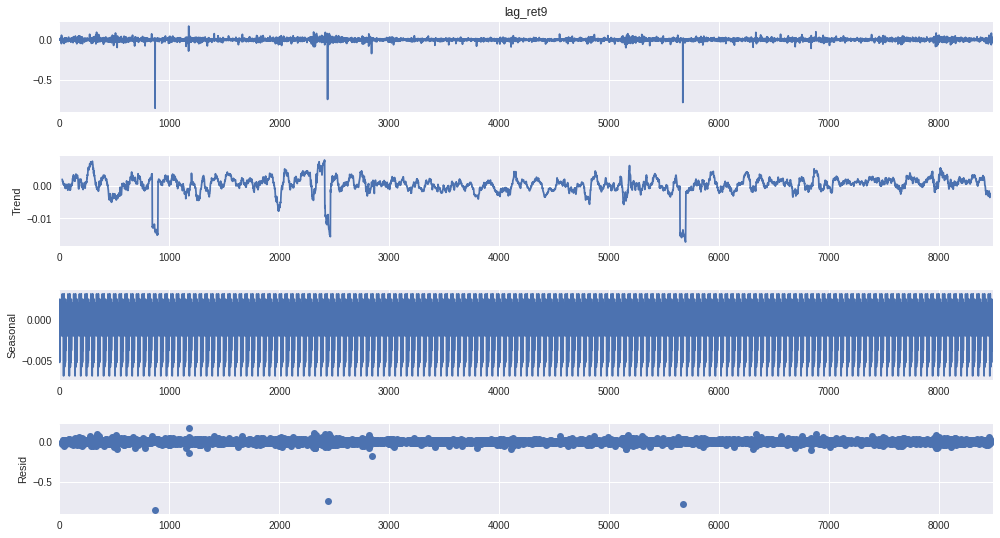

Seasonal decomposition of the feature: rsi


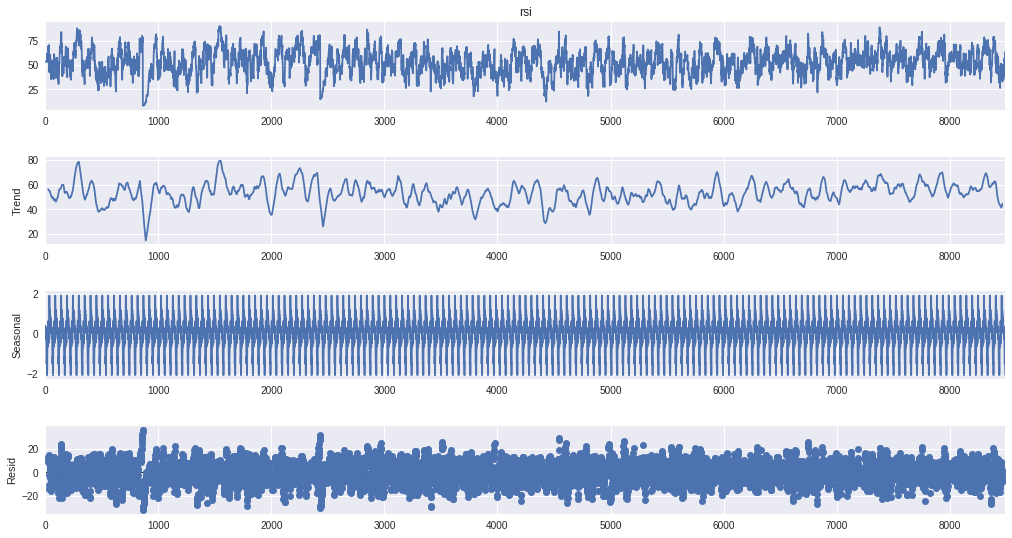

Seasonal decomposition of the feature: bb_high


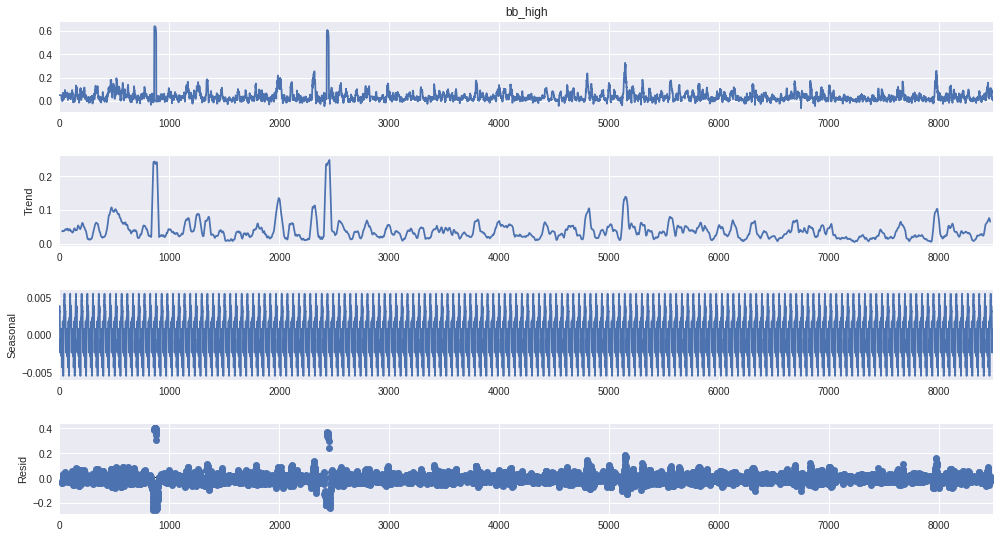

Seasonal decomposition of the feature: bb_low


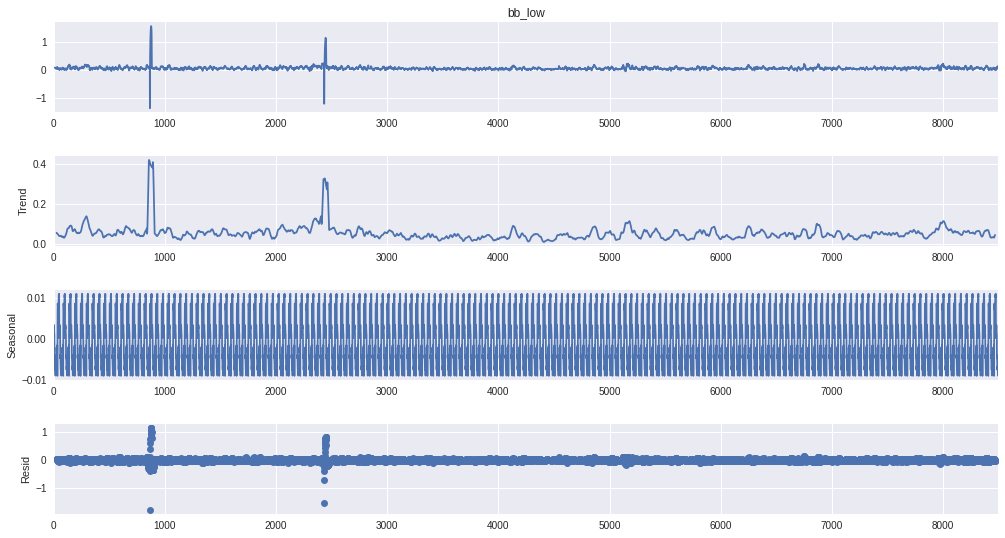

Seasonal decomposition of the feature: macd


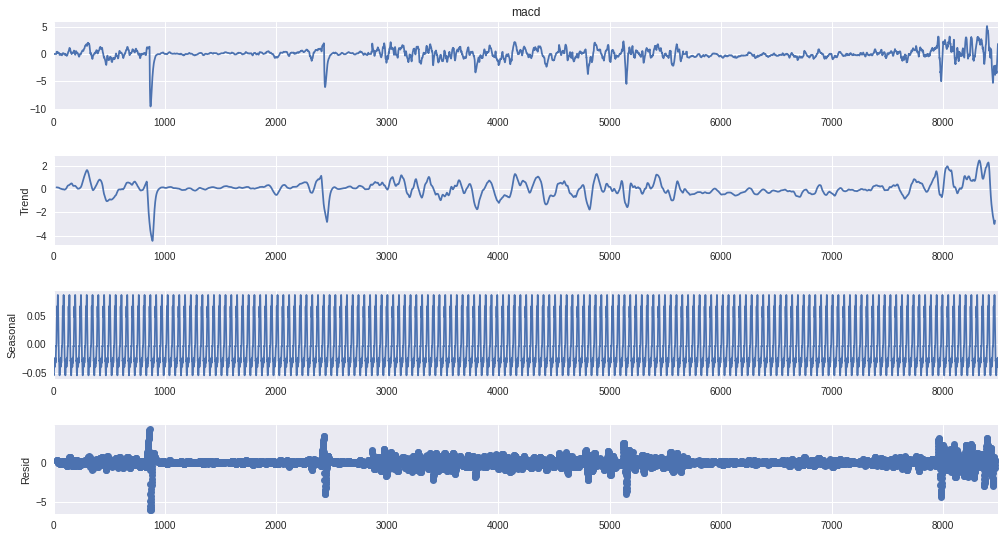

Seasonal decomposition of the feature: EMA For 50 Days


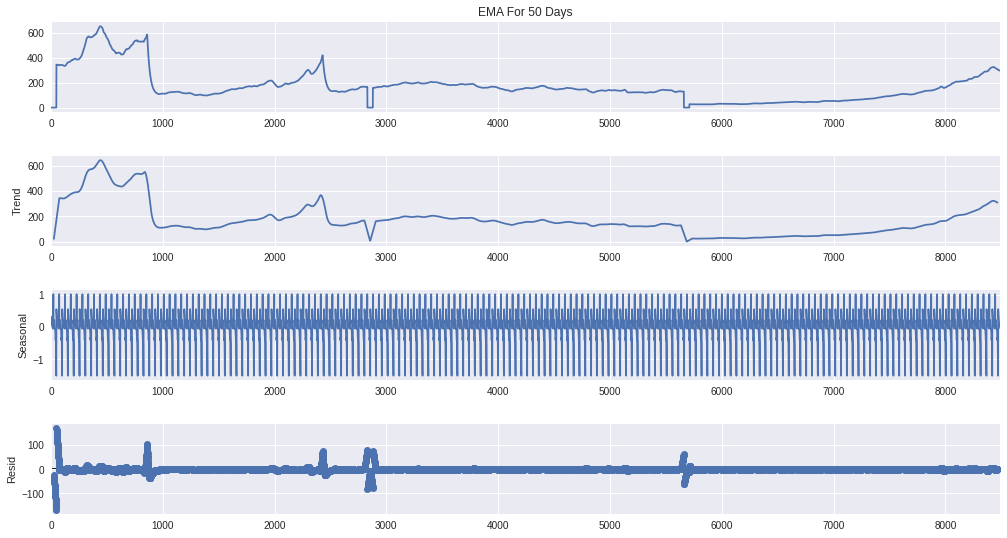

Seasonal decomposition of the feature: ADX


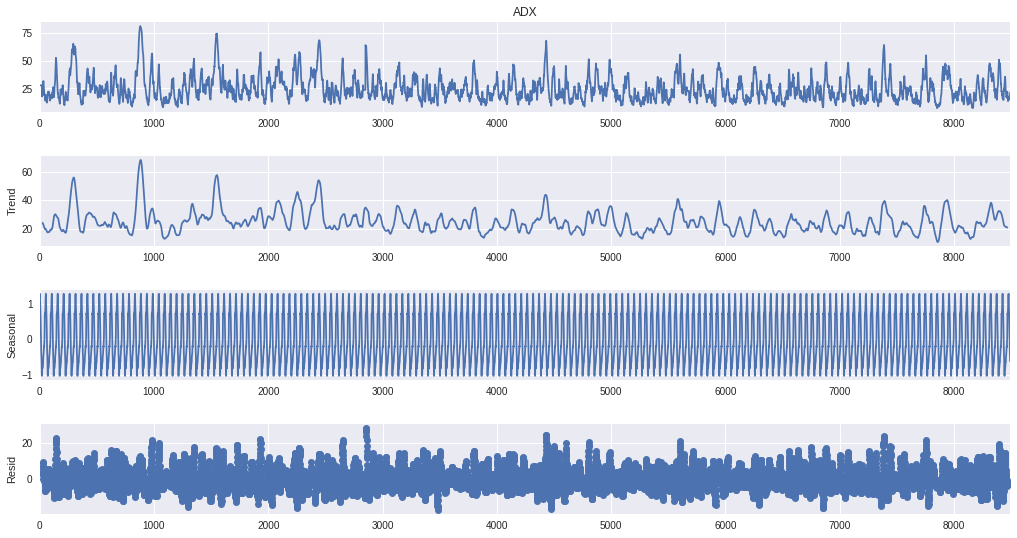

Seasonal decomposition of the feature: PutCallParity


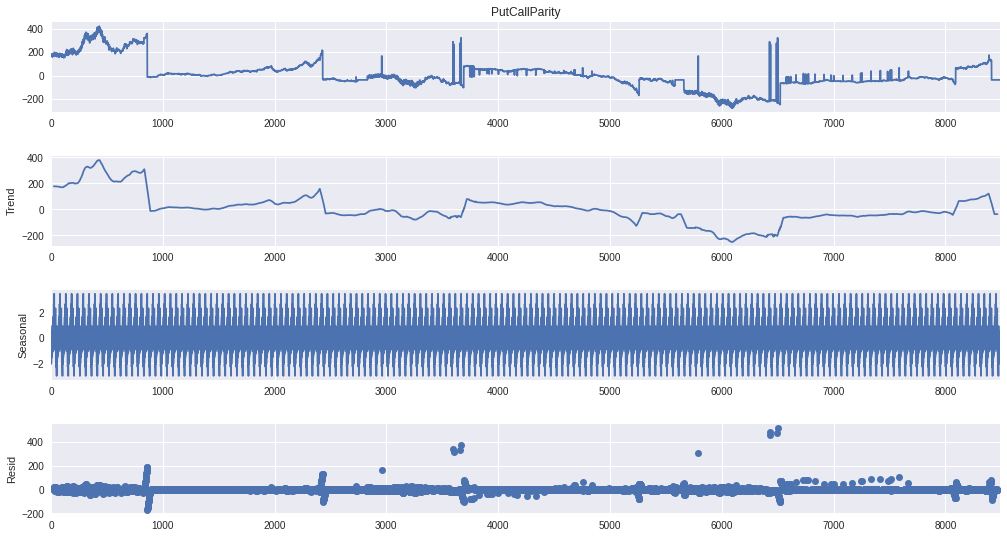

Seasonal decomposition of the feature: PutCallRatio


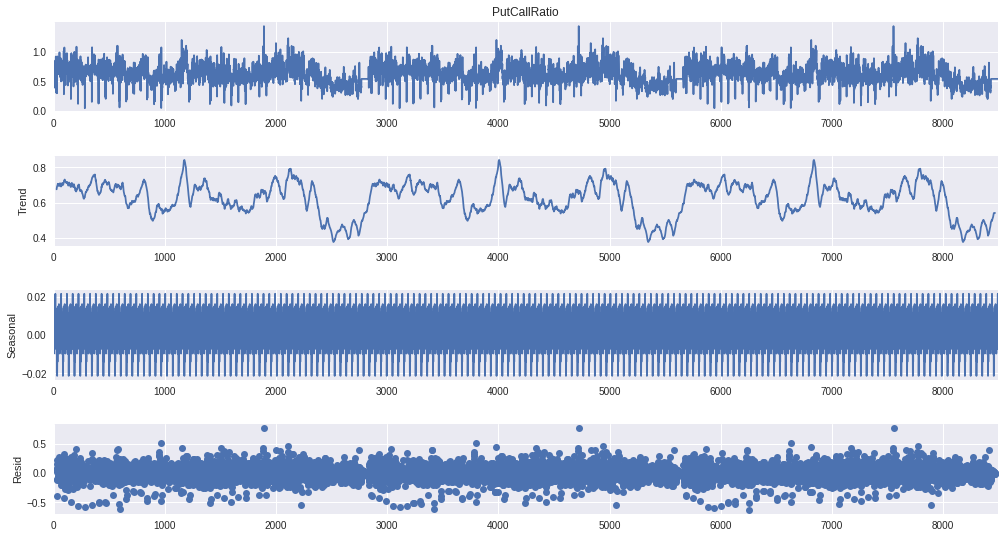

Seasonal decomposition of the feature: BID


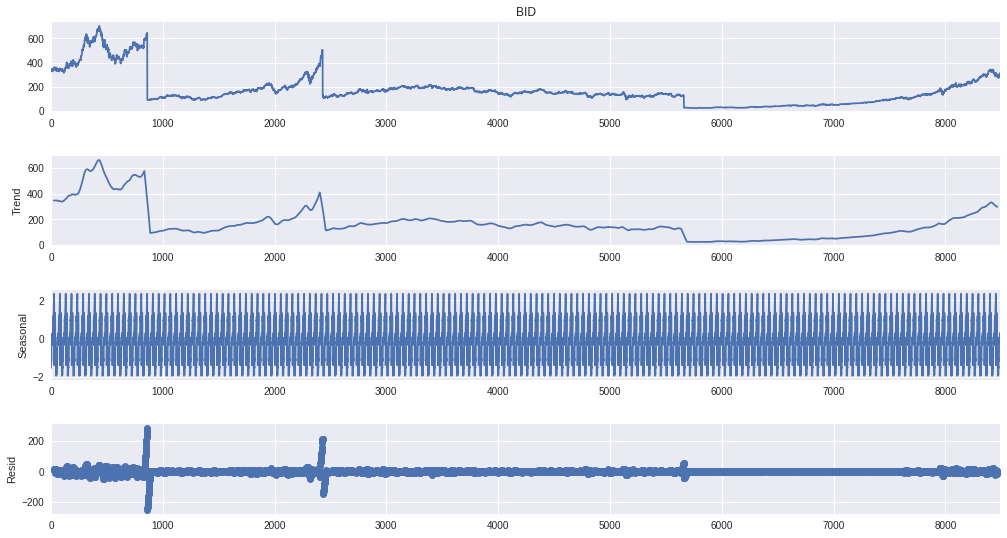

Seasonal decomposition of the feature: ASK


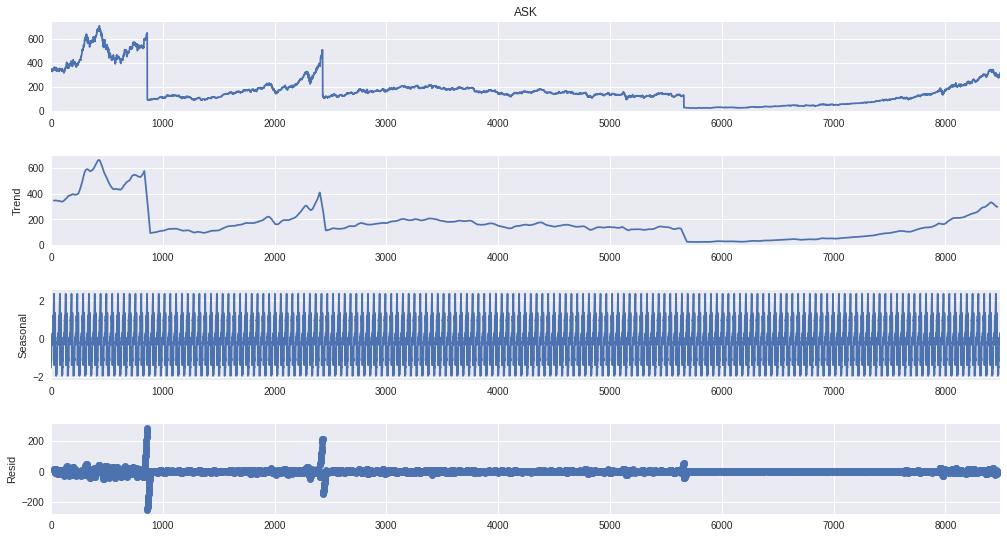

In [ ]:
import statsmodels.api as sm
features = ['OPENPRC','PRC','vol','sprtrn','dix','gex','vixo','lag_ret0', 'lag_ret1', 'lag_ret2', 'lag_ret3','lag_ret4','lag_ret5','lag_ret6','lag_ret7','lag_ret8','lag_ret9','rsi', 'bb_high', 'bb_low', 'macd', 'EMA For 50 Days', 'ADX', 'PutCallParity', 'PutCallRatio', 'BID', 'ASK']


for col in features:
  # Seasonal decomposition of the time series of the key features
  res = sm.tsa.seasonal_decompose(Complete_DataFrame[col],freq=52)
  fig = res.plot()
  fig.set_figheight(8)
  fig.set_figwidth(15)
  print("========================================================================")
  print("Seasonal decomposition of the feature:",col)
  print("========================================================================")
  pyplot.show()

Features sprtrn, gex, dix, vixo, close, PutCallRatio, etc. have trends and seasonal pattern which can be seen in the seasonal decomposition plots of the features timeseries data. Hence, the basic assumptions for smoothing are negated, as there isn't much of noise, and both trend and seasonality can be seen in the data over a period of time. Therefore the dataset does not require smoothing.